[데이콘 대회](https://dacon.io/competitions/official/235942/overview/description)

### 데이터 설명

- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)

In [1]:
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결
train = pd.read_csv('./dataset/dataset/train.csv')
test = pd.read_csv('./dataset/dataset/test.csv')
sample_submission = pd.read_csv('./dataset/dataset/sample_submission.csv')

In [3]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [5]:
# describe 메소드는 기초 통계량을 보여줍니다.
train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


In [6]:
train['Promotion1'].isna().sum()

4153

In [7]:
train['Promotion2'].isna().sum()

4663

In [8]:
train['Promotion3'].isna().sum()

4370

In [9]:
train['Promotion4'].isna().sum()

4436

In [10]:
train['Promotion5'].isna().sum()

4140

# 지점별

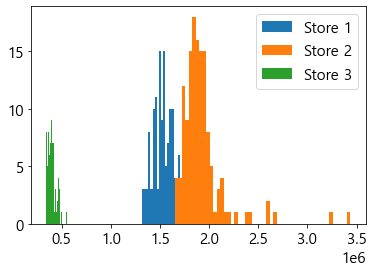

In [11]:
import matplotlib.pyplot as plt

# 이번엔 예측하고자 하는 값인 지점별 Weekly_Sales를 확인해봅니다.
plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.legend(['Store 1','Store 2','Store 3'])
plt.show()

- 지점에 따라 반매가 다르다는 것을 볼 수 있음

In [12]:
train['Store'].describe()

count    6255.000000
mean       23.000000
std        12.988211
min         1.000000
25%        12.000000
50%        23.000000
75%        34.000000
max        45.000000
Name: Store, dtype: float64

C:\Users\hansol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Weekly_Sales')

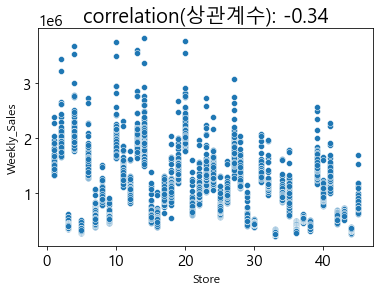

In [13]:
# 상관도 분석
correlation = train['Store'].corr(train['Weekly_Sales'])
sns.scatterplot(train['Store'], train['Weekly_Sales'])
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize=20)
plt.xlabel('Store', fontsize=12)
plt.ylabel('Weekly_Sales', fontsize=12)

In [14]:
train[train['Store']==1]['Weekly_Sales'].mean()

1555087.9248920865

In [15]:
train[train['Store']==1]['Weekly_Sales'].median()

1534849.64

In [16]:
train[train['Store']==1]['Weekly_Sales'].max()

2387950.2

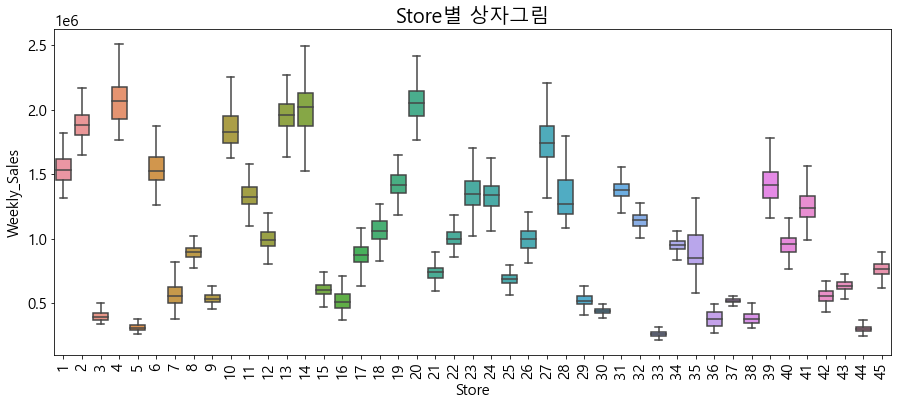

In [17]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Store', y='Weekly_Sales', data=train, showfliers=False)
g.set_title('Store별 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

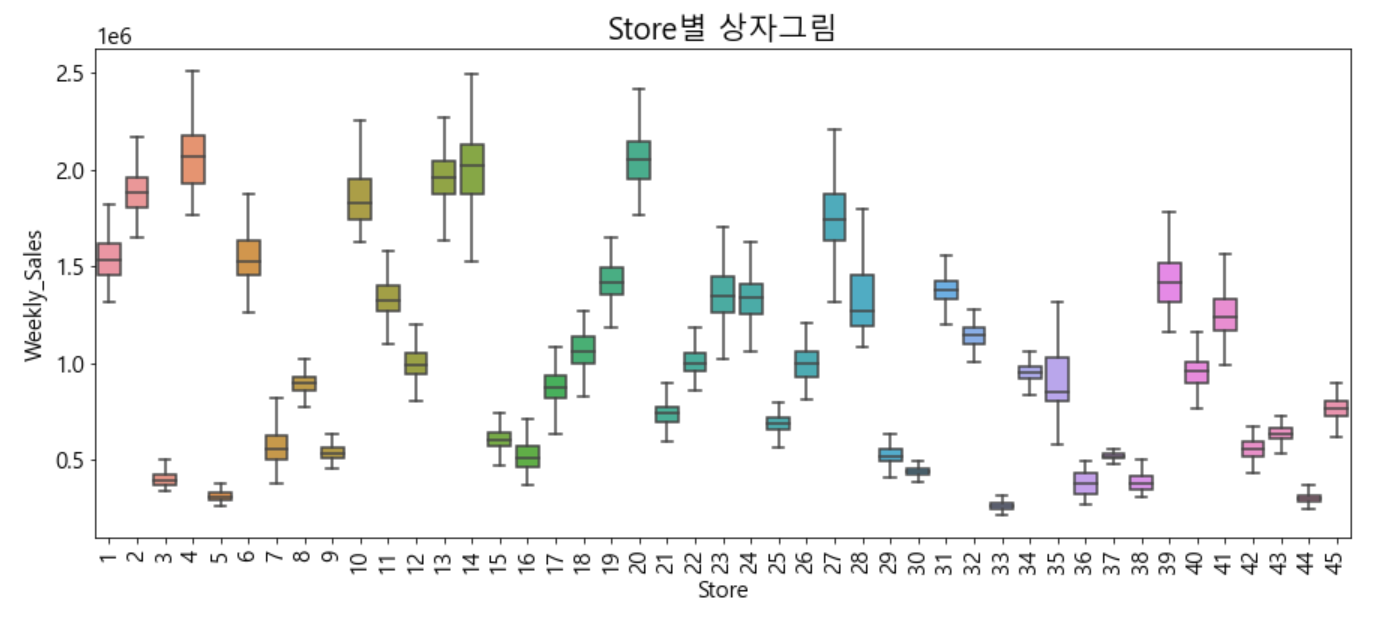

- 매점별로 판매량이 매우 다르다는 것을 볼 수 있음

In [18]:
train['Store'].value_counts().sort_index()

1     139
2     139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
22    139
23    139
24    139
25    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
45    139
Name: Store, dtype: int64

# 날짜

- 년도, 월, 일로 데이터를 분해
- IsHoliday가 Bool형식이기 때문에 0 또는 1로 전처리

In [19]:
# pandas의 fillna(0) 메소드를 활용합니다.
train = train.fillna(0)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [20]:
# Date 칼럼에서 "월"에 해당하는 정보만 추출하여 숫자 형태로 반환하는 함수를 작성합니다.
def get_month(date):
    month = date[3:5]
    month = int(month)
    return month

# 이 함수를 Date 칼럼에 적용한 Month 칼럼을 만들어줍니다.
train['Month'] = train['Date'].apply(get_month)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9


In [21]:
def get_day(date):
    day = date[0:2]
    day = int(day)
    return day

train['Day'] = train['Date'].apply(get_day)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21


In [22]:
def get_year(date):
    year = date[6:10]
    year = int(year)
    return year

train['Year'] = train['Date'].apply(get_year)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5,2010
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12,2010
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19,2010
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26,2010
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31,2012
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7,2012
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14,2012
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21,2012


In [23]:
# IsHoliday 칼럼의 값을 숫자 형태로 반환하는 함수를 작성합니다.
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

# 이 함수를 IsHoliday 칼럼에 적용한 NumberHoliday 칼럼을 만들어줍니다.
train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5,2010,0
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12,2010,1
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19,2010,0
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26,2010,0
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31,2012,0
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7,2012,1
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14,2012,0
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21,2012,0


In [24]:
# 결측치 처리
test = test.fillna(0)

# Date 전처리
test['Month'] = test['Date'].apply(get_month)

# IsHoliday 전처리
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)

test['Day'] = test['Date'].apply(get_day)
test['Year'] = test['Date'].apply(get_year)

In [25]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5,2010,0
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12,2010,1
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19,2010,0
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26,2010,0
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31,2012,0
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7,2012,1
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14,2012,0
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21,2012,0


## 년도별로 분석

In [26]:
year2010_train = train[train['Year']==2010].reset_index(drop=True)
year2011_train = train[train['Year']==2011].reset_index(drop=True)
year2012_train = train[train['Year']==2012].reset_index(drop=True)

In [27]:
year2010_train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,2,5,2010,0
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,2,12,2010,1
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,2,19,2010,0
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,2,26,2010,0
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,6160,45,03/12/2010,40.93,3.046,0.0,0.0,0.0,0.0,0.0,8.724,False,879244.90,12,3,2010,0
2156,6161,45,10/12/2010,30.54,3.109,0.0,0.0,0.0,0.0,0.0,8.724,False,1002364.34,12,10,2010,0
2157,6162,45,17/12/2010,30.51,3.140,0.0,0.0,0.0,0.0,0.0,8.724,False,1123282.85,12,17,2010,0
2158,6163,45,24/12/2010,30.59,3.141,0.0,0.0,0.0,0.0,0.0,8.724,False,1682862.03,12,24,2010,0


In [28]:
year2011_train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,49,1,07/01/2011,48.27,2.976,0.00,0.00,0.00,0.00,0.00,7.742,False,1444732.28,1,7,2011,0
1,50,1,14/01/2011,35.40,2.983,0.00,0.00,0.00,0.00,0.00,7.742,False,1391013.96,1,14,2011,0
2,51,1,21/01/2011,44.04,3.016,0.00,0.00,0.00,0.00,0.00,7.742,False,1327405.42,1,21,2011,0
3,52,1,28/01/2011,43.83,3.010,0.00,0.00,0.00,0.00,0.00,7.742,False,1316899.31,1,28,2011,0
4,53,1,04/02/2011,42.27,2.989,0.00,0.00,0.00,0.00,0.00,7.742,False,1606629.58,2,4,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,6212,45,02/12/2011,50.19,3.452,6835.61,120.76,802.79,2490.15,17861.50,8.523,False,875699.81,12,2,2011,0
2336,6213,45,09/12/2011,46.57,3.415,6176.69,2.87,379.57,1593.44,10170.50,8.523,False,957155.31,12,9,2011,0
2337,6214,45,16/12/2011,39.93,3.413,4631.26,8.92,801.34,848.33,2757.82,8.523,False,1078905.68,12,16,2011,0
2338,6215,45,23/12/2011,42.27,3.389,797.10,89.14,1962.19,17.00,2985.51,8.523,False,1521957.99,12,23,2011,0


In [29]:
year2012_train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,101,1,06/01/2012,49.01,3.157,6277.39,21813.16,143.10,1450.13,8483.00,7.348,False,1550369.92,1,6,2012,0
1,102,1,13/01/2012,48.53,3.261,5183.29,8025.87,42.24,453.08,3719.38,7.348,False,1459601.17,1,13,2012,0
2,103,1,20/01/2012,54.11,3.268,4139.87,2807.19,33.88,500.62,3400.21,7.348,False,1394393.84,1,20,2012,0
3,104,1,27/01/2012,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,7.348,False,1319325.59,1,27,2012,0
4,105,1,03/02/2012,56.55,3.360,34577.06,3579.21,160.53,32403.87,5630.40,7.348,False,1636339.65,2,3,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31,2012,0
1751,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7,2012,1
1752,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14,2012,0
1753,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21,2012,0


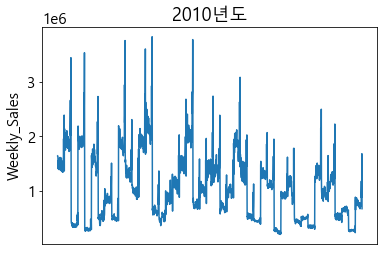

In [30]:
plt.plot(year2010_train['Weekly_Sales'])
plt.title("2010년도")
plt.ylabel("Weekly_Sales")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

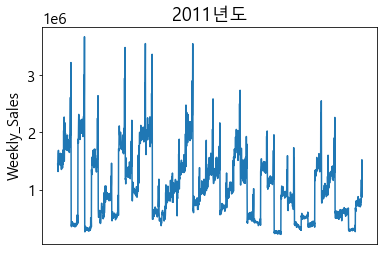

In [31]:
plt.plot(year2011_train['Weekly_Sales'])
plt.title("2011년도")
plt.ylabel("Weekly_Sales")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

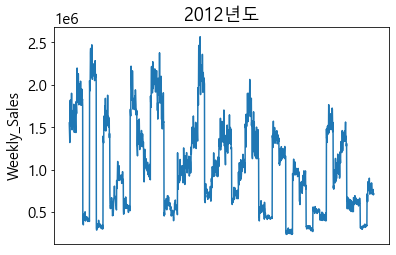

In [32]:
plt.plot(year2012_train['Weekly_Sales'])
plt.title("2012년도")
plt.ylabel("Weekly_Sales")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

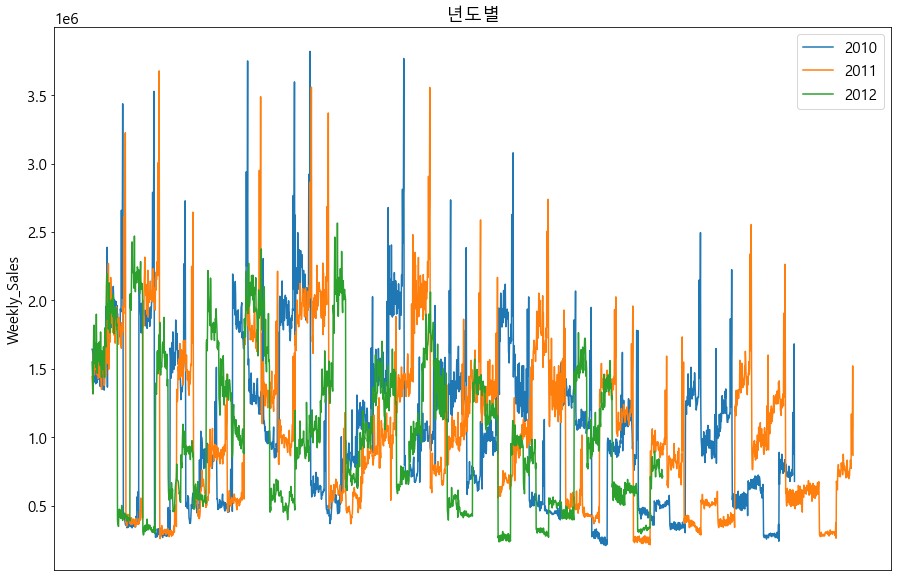

In [33]:
plt.figure(figsize=(15,10))
plt.plot(year2010_train['Weekly_Sales'])
plt.plot(year2011_train['Weekly_Sales'])
plt.plot(year2012_train['Weekly_Sales'])
plt.title("년도별")
plt.ylabel("Weekly_Sales")
plt.legend(['2010','2011','2012'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

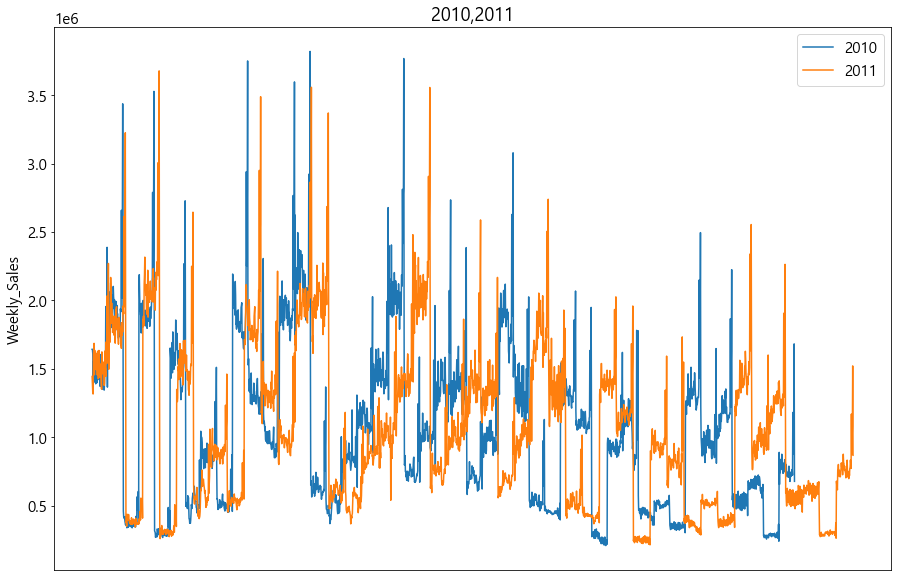

In [34]:
plt.figure(figsize=(15,10))
plt.plot(year2010_train['Weekly_Sales'])
plt.plot(year2011_train['Weekly_Sales'])
# plt.plot(year2012_train['Weekly_Sales'])
plt.title("2010,2011")
plt.ylabel("Weekly_Sales")
plt.legend(['2010','2011'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

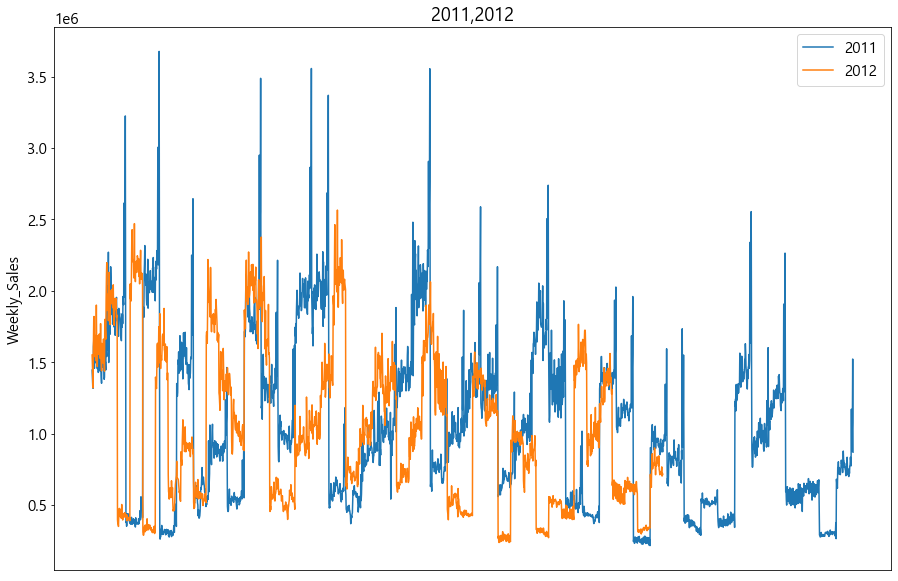

In [35]:
plt.figure(figsize=(15,10))
plt.plot(year2011_train['Weekly_Sales'])
plt.plot(year2012_train['Weekly_Sales'])
# plt.plot(year2012_train['Weekly_Sales'])
plt.title("2011,2012")
plt.ylabel("Weekly_Sales")
plt.legend(['2011','2012'])
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

- 거의 같은 형태의 그래프 개형을 보여줌
- 년도별이 아닌 월별로 분석해야할 것 같음

## 월별로 분석

In [36]:
year2010_train['Month'].value_counts().sort_index()

2     180
3     180
4     225
5     180
6     180
7     225
8     180
9     180
10    225
11    180
12    225
Name: Month, dtype: int64

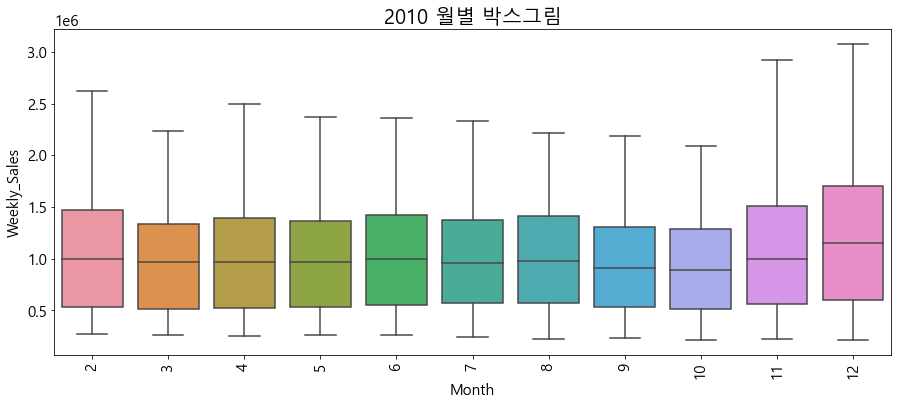

In [37]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Month', y='Weekly_Sales', data=year2010_train, showfliers=False)
g.set_title('2010 월별 박스그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [38]:
year2011_train['Month'].value_counts().sort_index()

1     180
2     180
3     180
4     225
5     180
6     180
7     225
8     180
9     225
10    180
11    180
12    225
Name: Month, dtype: int64

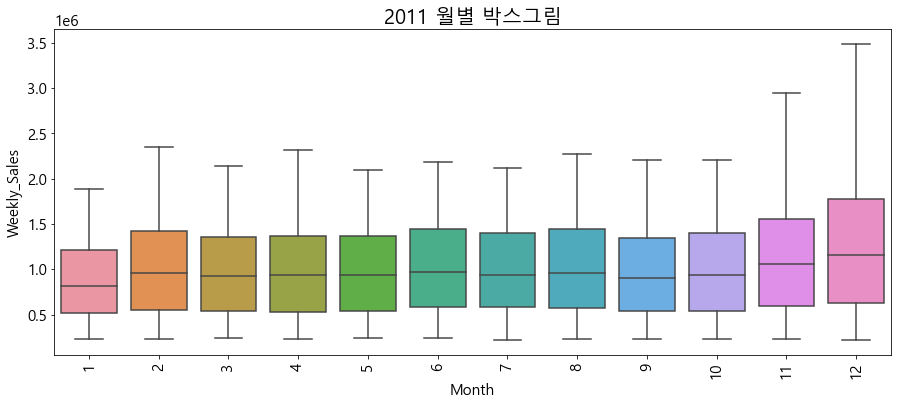

In [39]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Month', y='Weekly_Sales', data=year2011_train, showfliers=False)
g.set_title('2011 월별 박스그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [40]:
year2012_train['Month'].value_counts().sort_index()

1    180
2    180
3    225
4    180
5    180
6    225
7    180
8    225
9    180
Name: Month, dtype: int64

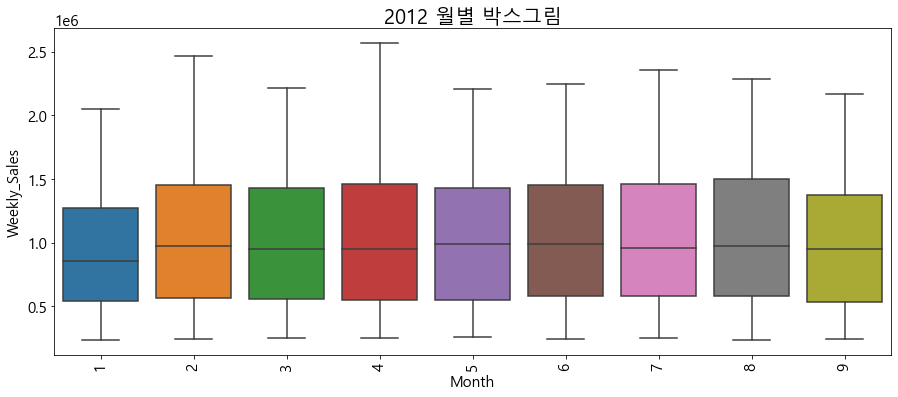

In [41]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Month', y='Weekly_Sales', data=year2012_train, showfliers=False)
g.set_title('2012 월별 박스그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

- 1월에 낮고 12월에 높음

- 일별은 분석하기 애매하고 크게 상관없을 것으로 사료됨

- 월별로 휴일이 며칠있는지 확인

In [42]:
def holi_counts(data,i):
    data2 = data[data['Month']==i]['NumberHoliday'].value_counts()
    if len(data2) == 2:
        return data2.iloc[1]
    else :
        return 0

In [43]:
# 2010년도 휴일 수
cnt_holi_2010 = []
for i in (range(13)):
    cnt_holi_2010.append(holi_counts(year2010_train,i))

In [44]:
cnt_holi_2010

[0, 0, 45, 0, 0, 0, 0, 0, 0, 45, 0, 45, 45]

In [45]:
# 2011년도 휴일 수
cnt_holi_2011 = []
for i in (range(13)):
    cnt_holi_2011.append(holi_counts(year2011_train,i))

In [46]:
cnt_holi_2011

[0, 0, 45, 0, 0, 0, 0, 0, 0, 45, 0, 45, 45]

In [47]:
# 2012년도 휴일 수
cnt_holi_2012 = []
for i in (range(13)):
    cnt_holi_2012.append(holi_counts(year2012_train,i))

In [48]:
cnt_holi_2012

[0, 0, 45, 0, 0, 0, 0, 0, 0, 45, 0, 0, 0]

# 온도

In [49]:
tem_train = train.sort_values('Temperature').reset_index(drop=True)

In [50]:
tem_train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,887,7,04/02/2011,-2.06,3.011,0.00,0.00,0.00,0.00,0.00,8.818,False,558027.77,2,4,2011,0
1,3527,26,28/01/2011,5.54,3.243,0.00,0.00,0.00,0.00,0.00,7.907,False,817485.14,1,28,2011,0
2,2273,17,07/01/2011,6.23,2.891,0.00,0.00,0.00,0.00,0.00,6.866,False,1083071.14,1,7,2011,0
3,936,7,13/01/2012,7.46,3.077,3167.26,5926.48,0.54,191.84,1415.69,8.256,False,593875.46,1,13,2012,0
4,5473,40,28/01/2011,9.51,3.243,0.00,0.00,0.00,0.00,0.00,5.114,False,775910.43,1,28,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,1554,12,23/07/2010,99.22,3.112,0.00,0.00,0.00,0.00,0.00,14.180,False,912403.67,7,23,2010,0
6251,3778,28,23/07/2010,99.22,3.112,0.00,0.00,0.00,0.00,0.00,14.180,False,1205884.98,7,23,2010,0
6252,4530,33,26/08/2011,99.66,3.663,0.00,0.00,0.00,0.00,0.00,8.442,False,237095.82,8,26,2011,0
6253,4580,33,10/08/2012,100.07,3.811,90.89,0.00,0.00,0.00,278.04,7.147,False,297753.49,8,10,2012,0


C:\Users\hansol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


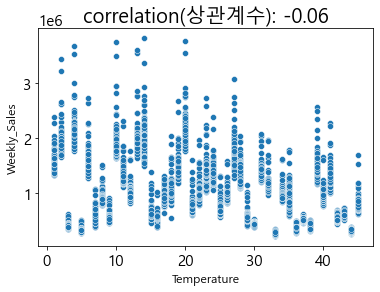

In [51]:
# 상관도 분석
correlation = tem_train['Temperature'].corr(tem_train['Weekly_Sales'])
sns.scatterplot(tem_train['Store'], tem_train['Weekly_Sales'])
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize=20)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Weekly_Sales', fontsize=12)
plt.show()

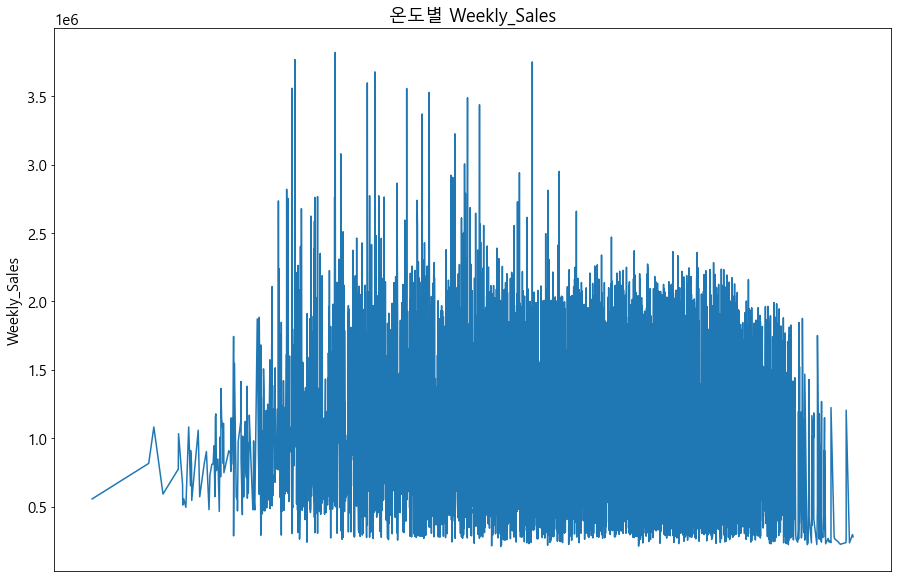

In [52]:
plt.figure(figsize=(15,10))
plt.plot(tem_train['Temperature'],tem_train['Weekly_Sales'])
plt.title("온도별 Weekly_Sales")
plt.ylabel("Weekly_Sales")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

- 더 볼필요도 없이 상관도가 전혀 없음

# 연료비

In [53]:
fuel_train = train.sort_values('Fuel_Price').reset_index(drop=True)

In [54]:
fuel_train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,4868,36,19/02/2010,45.66,2.472,0.00,0.00,0.00,0.00,0.00,8.554,False,470281.03,2,19,2010,0
1,4897,36,10/09/2010,80.58,2.513,0.00,0.00,0.00,0.00,0.00,8.360,True,434471.38,9,10,2010,1
2,5285,39,19/02/2010,43.96,2.514,0.00,0.00,0.00,0.00,0.00,8.554,False,1230591.97,2,19,2010,0
3,281,3,19/02/2010,47.07,2.514,0.00,0.00,0.00,0.00,0.00,7.368,False,421642.19,2,19,2010,0
4,1393,11,19/02/2010,48.30,2.514,0.00,0.00,0.00,0.00,0.00,7.368,False,1503298.70,2,19,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,5812,42,30/03/2012,67.92,4.294,341.00,1.50,0.00,21.94,1431.13,7.545,False,544408.14,3,30,2012,0
6251,3866,28,30/03/2012,64.36,4.294,11704.17,57.61,11.85,1537.38,2536.67,12.187,False,1209524.11,3,30,2012,0
6252,5819,42,18/05/2012,85.19,4.308,354.41,0.00,0.00,0.00,1393.17,7.382,False,590636.38,5,18,2012,0
6253,4568,33,18/05/2012,89.81,4.308,103.81,0.00,0.00,0.00,2161.91,7.396,False,276899.95,5,18,2012,0


C:\Users\hansol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


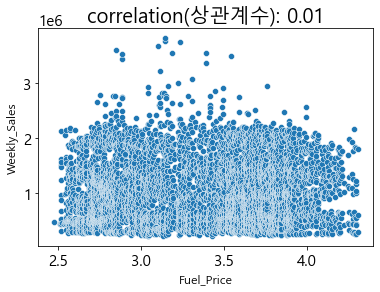

In [55]:
# 상관도 분석
correlation = fuel_train['Fuel_Price'].corr(fuel_train['Weekly_Sales'])
sns.scatterplot(fuel_train['Fuel_Price'], fuel_train['Weekly_Sales'])
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize=20)
plt.xlabel('Fuel_Price', fontsize=12)
plt.ylabel('Weekly_Sales', fontsize=12)
plt.show()

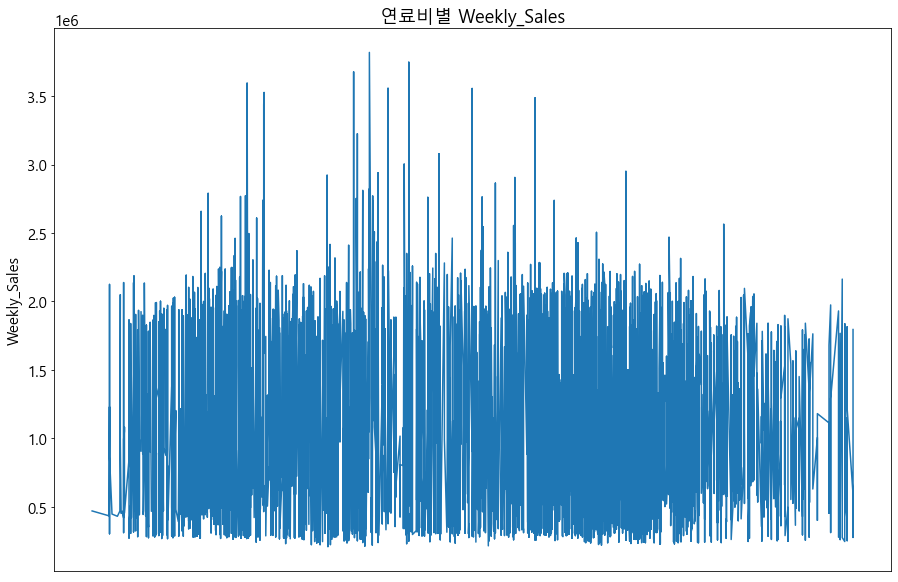

In [56]:
plt.figure(figsize=(15,10))
plt.plot(fuel_train['Fuel_Price'],fuel_train['Weekly_Sales'])
plt.title("연료비별 Weekly_Sales")
plt.ylabel("Weekly_Sales")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

# 실업률

In [57]:
unem_train = train.sort_values('Unemployment').reset_index(drop=True)

C:\Users\hansol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


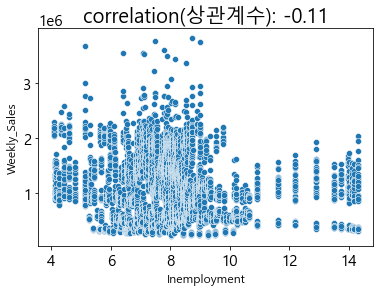

In [58]:
# 상관도 분석
correlation = unem_train['Unemployment'].corr(unem_train['Weekly_Sales'])
sns.scatterplot(unem_train['Unemployment'], unem_train['Weekly_Sales'])
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize=20)
plt.xlabel('Inemployment', fontsize=12)
plt.ylabel('Weekly_Sales', fontsize=12)
plt.show()

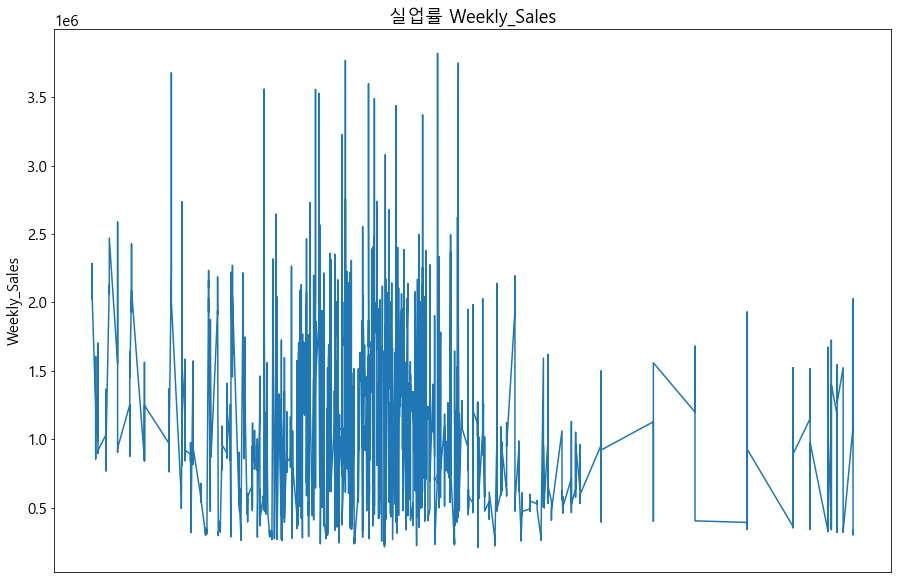

In [59]:
plt.figure(figsize=(15,10))
plt.plot(unem_train['Unemployment'],unem_train['Weekly_Sales'])
plt.title("실업률 Weekly_Sales")
plt.ylabel("Weekly_Sales")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

- 관련 없음

# 휴일

In [60]:
train['NumberHoliday'].value_counts()

0    5805
1     450
Name: NumberHoliday, dtype: int64

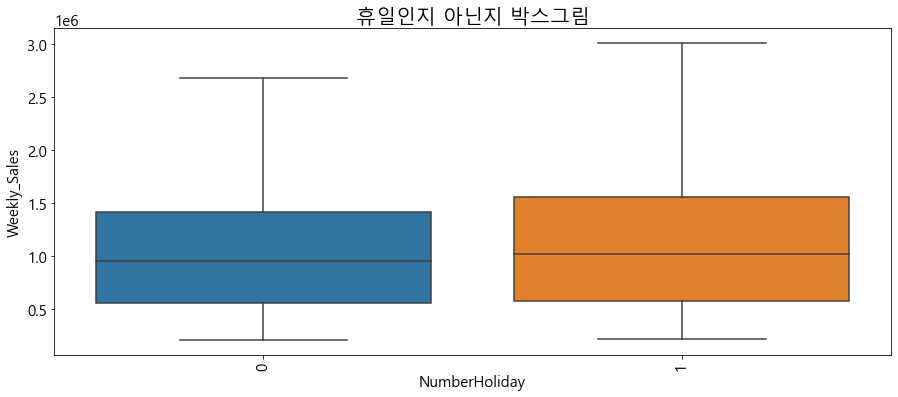

In [61]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='NumberHoliday', y='Weekly_Sales', data=train, showfliers=False)
g.set_title('휴일인지 아닌지 박스그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

- 휴일때 매출이 약간 상승함

---

# 해야할 것 

- 지점별로 나눠어서 데이터 분석 진행해야함
- **상관도가 높은 것 부터 묶어서 분석하는 것이 중요함**

# 지점별 데이터분석

In [62]:
def sort_data(data,i):
    data2 = data[data['Store']==i].reset_index(drop=True)
    return data2

In [63]:
 for i in range(1,46):
    globals()['store_{}'.format(i)] = sort_data(train,i)

In [64]:
store_45

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,6117,45,05/02/2010,27.31,2.784,0.00,0.00,0.00,0.00,0.00,8.992,False,890689.51,2,5,2010,0
1,6118,45,12/02/2010,27.73,2.773,0.00,0.00,0.00,0.00,0.00,8.992,True,656988.64,2,12,2010,1
2,6119,45,19/02/2010,31.27,2.745,0.00,0.00,0.00,0.00,0.00,8.992,False,841264.04,2,19,2010,0
3,6120,45,26/02/2010,34.89,2.754,0.00,0.00,0.00,0.00,0.00,8.992,False,741891.65,2,26,2010,0
4,6121,45,05/03/2010,37.13,2.777,0.00,0.00,0.00,0.00,0.00,8.992,False,777951.22,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31,2012,0
135,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7,2012,1
136,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14,2012,0
137,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21,2012,0


## 지점1

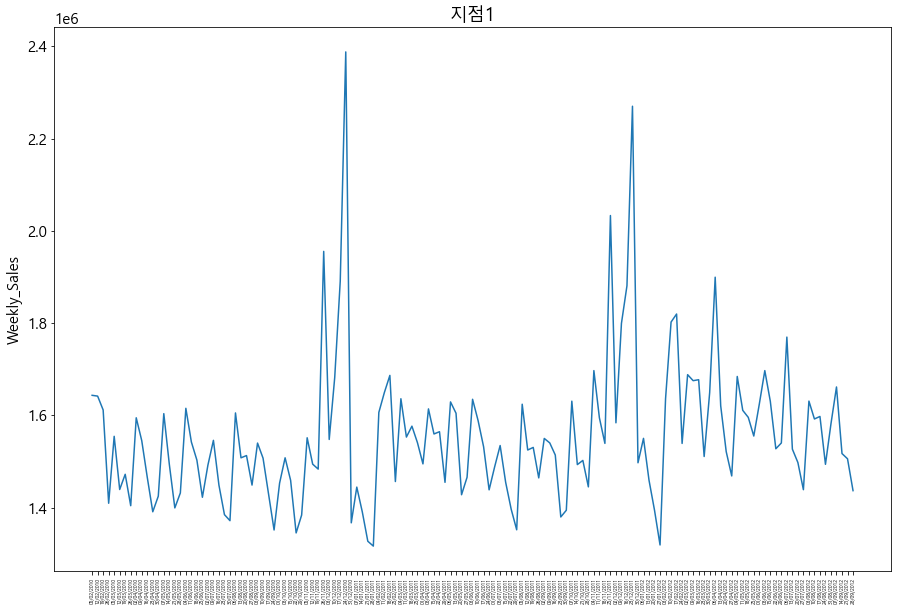

In [65]:
plt.figure(figsize=(15,10))
plt.plot(store_1['Date'],store_1['Weekly_Sales'])
plt.title("지점1")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90,size=5)
# ax = plt.gca()
# ax.get_xaxis().set_visible(False)
plt.show()

In [66]:
store_1.sort_values('Weekly_Sales')

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
51,52,1,28/01/2011,43.83,3.010,0.00,0.00,0.00,0.00,0.00,7.742,False,1316899.31,1,28,2011,0
103,104,1,27/01/2012,54.26,3.290,1164.46,1082.74,44.00,11.00,1222.19,7.348,False,1319325.59,1,27,2012,0
50,51,1,21/01/2011,44.04,3.016,0.00,0.00,0.00,0.00,0.00,7.742,False,1327405.42,1,21,2011,0
37,38,1,22/10/2010,69.86,2.725,0.00,0.00,0.00,0.00,0.00,7.838,False,1345454.00,10,22,2010,0
33,34,1,24/09/2010,80.94,2.624,0.00,0.00,0.00,0.00,0.00,7.787,False,1351791.03,9,24,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,1,06/04/2012,70.43,3.891,10121.97,0.00,77.98,3750.59,4510.72,7.143,False,1899676.88,4,6,2012,0
42,43,1,26/11/2010,64.52,2.735,0.00,0.00,0.00,0.00,0.00,7.838,True,1955624.11,11,26,2010,1
94,95,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,7.866,True,2033320.66,11,25,2011,1
98,99,1,23/12/2011,47.96,3.112,2725.36,40.48,634.70,24.90,2739.43,7.866,False,2270188.99,12,23,2011,0


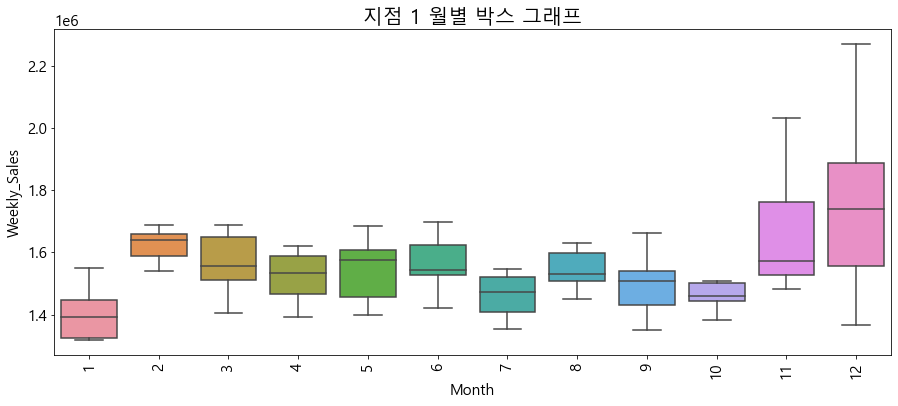

In [67]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Month', y='Weekly_Sales', data=store_1, showfliers=False)
g.set_title('지점 1 월별 박스 그래프', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

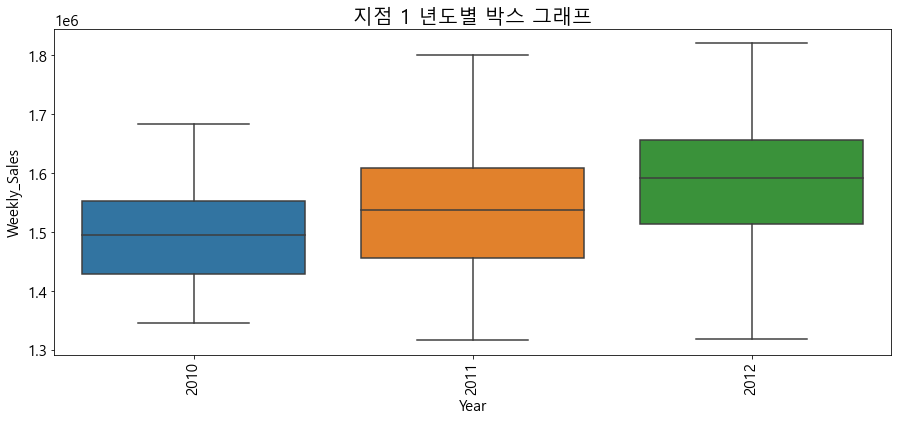

In [68]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Year', y='Weekly_Sales', data=store_1, showfliers=False)
g.set_title('지점 1 년도별 박스 그래프', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [69]:
def mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 박스 그래프")
    g = sns.boxplot(x='Month', y='Weekly_Sales', data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 박스 그래프'.format(i), size = 10)

    g = sns.boxplot(x='Month', y='Weekly_Sales', data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 박스 그래프'.format(i), size = 10)
    
    g = sns.boxplot(x='Month', y='Weekly_Sales', data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 박스 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

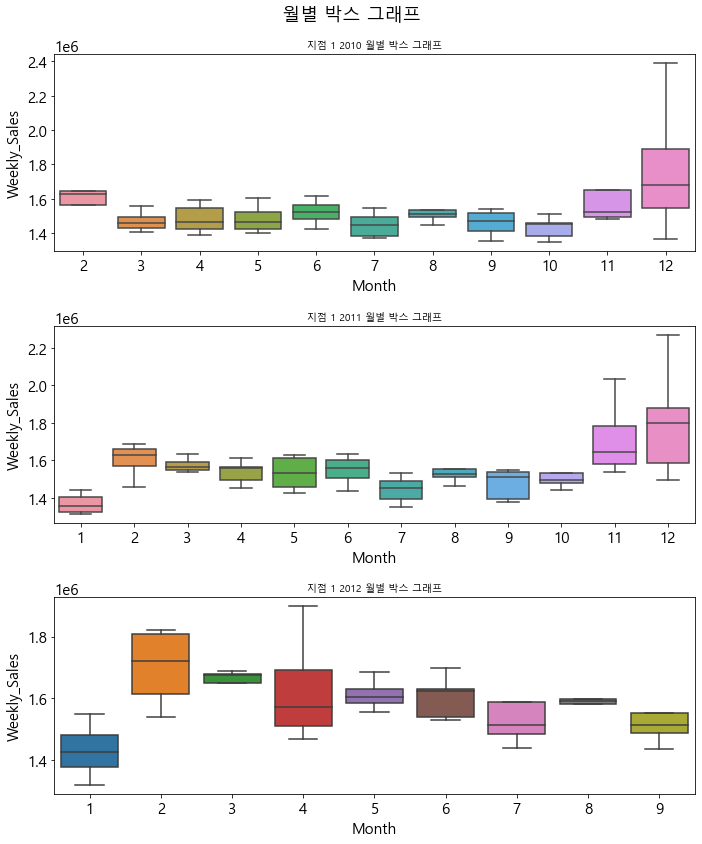

In [70]:
mon(store_1,1)

- 1월달이 낮고, 2월, 11월, 12월달에 매출이 큼

In [71]:
def tem_mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 온도 박스 그래프")
    g = sns.boxplot(x='Month', y='Temperature', data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 박스 그래프'.format(i), size = 10)

    g = sns.boxplot(x='Month', y='Temperature', data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 박스 그래프'.format(i), size = 10)
    
    g = sns.boxplot(x='Month', y='Temperature', data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 박스 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

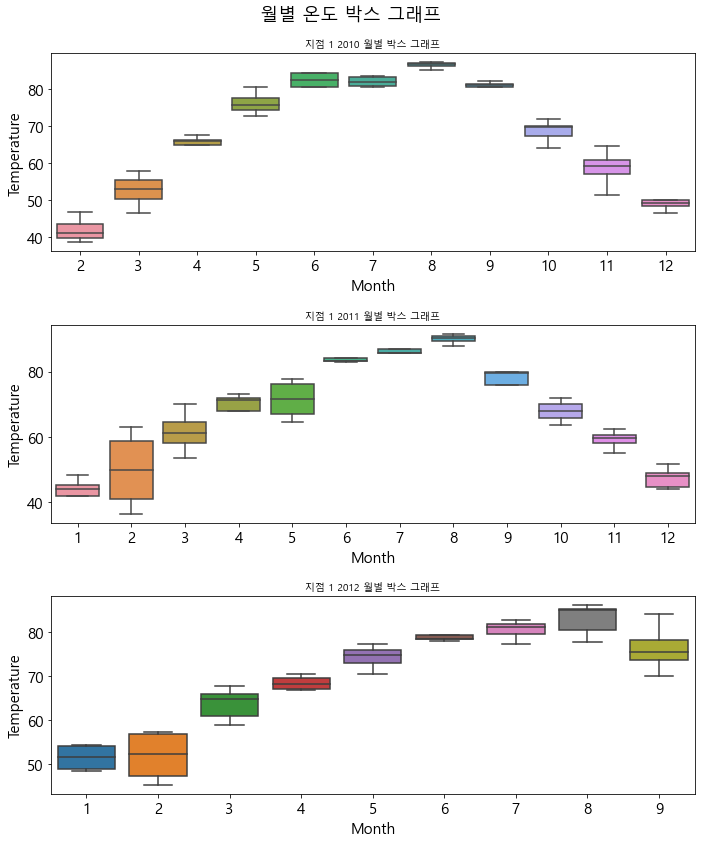

In [72]:
tem_mon(store_1,1)

In [73]:
def fuel_mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 연료비 박스 그래프")
    g = sns.boxplot(x='Month', y='Fuel_Price', data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 박스 그래프'.format(i), size = 10)

    g = sns.boxplot(x='Month', y='Fuel_Price', data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 박스 그래프'.format(i), size = 10)
    
    g = sns.boxplot(x='Month', y='Fuel_Price', data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 박스 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

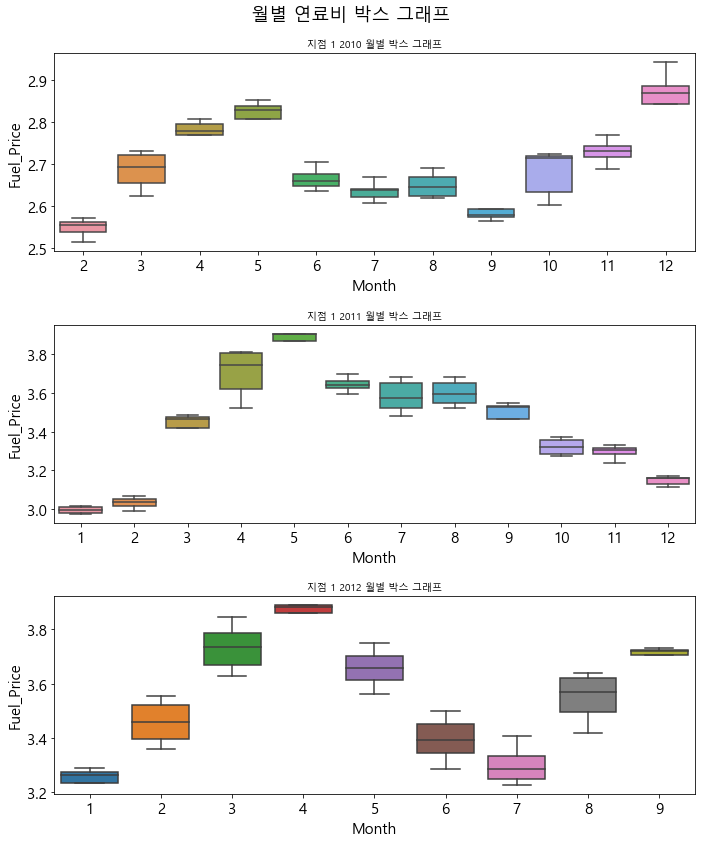

In [74]:
fuel_mon(store_1,1)

In [75]:
def unem_mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 실업률 그래프")
    
    axs[0].plot(data2['Month'],data2['Unemployment'])
#     g = sns.boxplot(x='Month', y='Unemployment', data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 그래프'.format(i), size = 10)

    axs[1].plot(data3['Month'],data3['Unemployment'])
#     g = sns.boxplot(x='Month', y='Unemployment', data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 그래프'.format(i), size = 10)
    
    axs[2].plot(data4['Month'],data4['Unemployment'])
#     g = sns.boxplot(x='Month', y='Unemployment', data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

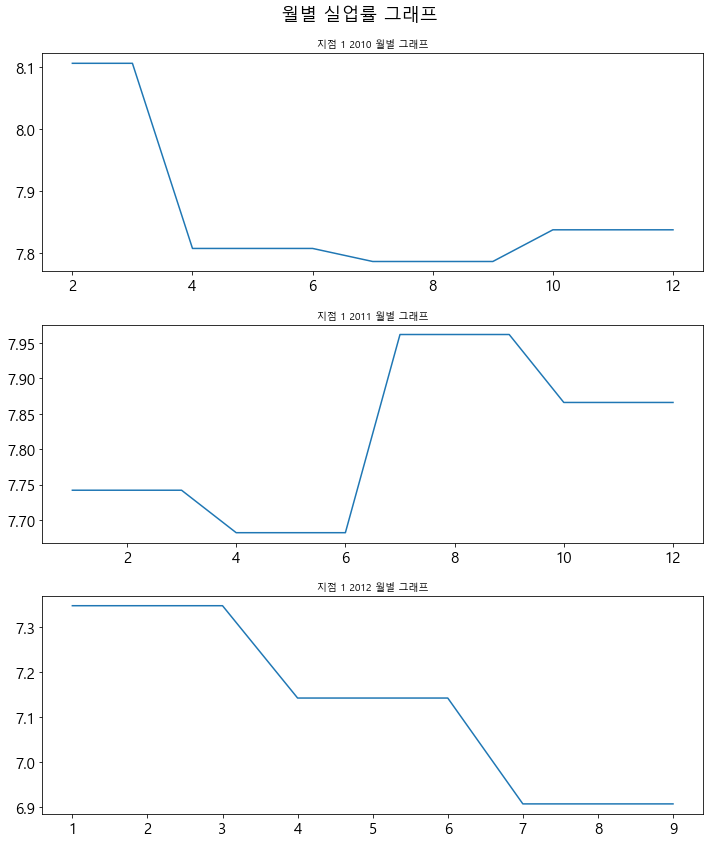

In [76]:
unem_mon(store_1,1)

In [77]:
def holi_mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 휴일 박스 그래프")
    
    g = sns.boxplot(x='NumberHoliday', y='Weekly_Sales', data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 그래프'.format(i), size = 10)


    g = sns.boxplot(x='NumberHoliday', y='Weekly_Sales', data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 그래프'.format(i), size = 10)
    
    
    g = sns.boxplot(x='NumberHoliday', y='Weekly_Sales', data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

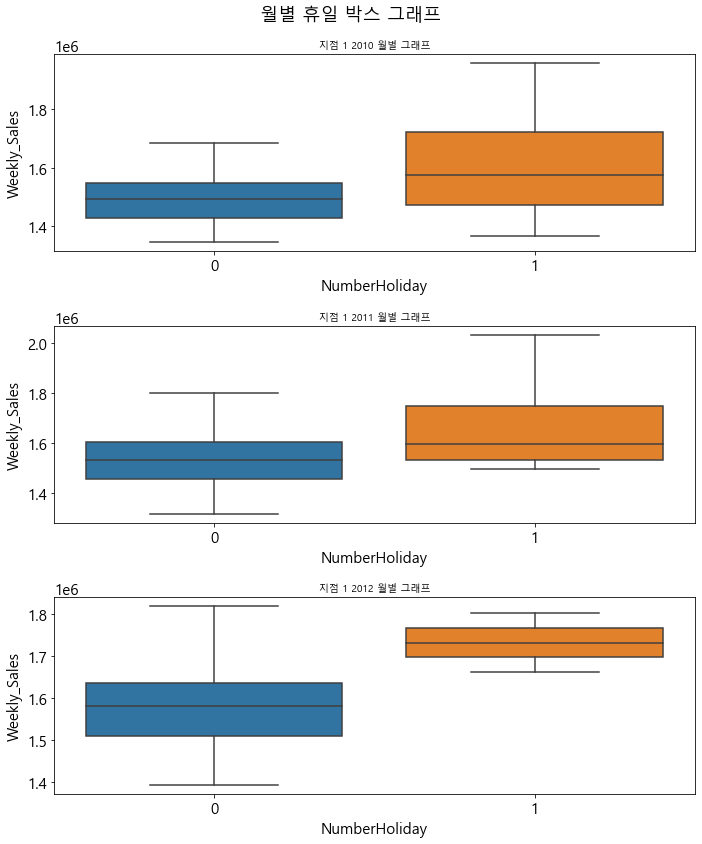

In [78]:
holi_mon(store_1,1)

In [79]:
def holi_counts(data,i):
    data2 = data[data['Month']==i]['NumberHoliday'].value_counts()
    if len(data2) == 2:
        return data2.iloc[1]
    else :
        return 0

In [80]:
def holi2_mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    data2_2 = []
    data3_2 = []
    data4_2 = []
    for j in (range(1,13)):
        data2_2.append(holi_counts(data2,j))
        data3_2.append(holi_counts(data2,j))
        data4_2.append(holi_counts(data2,j))
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 휴일 개수 그래프")
    
    month = [1,2,3,4,5,6,7,8,9,10,11,12]
    axs[0].plot(month,data2_2)
    axs[0].set_title('지점 {} 2010 월별 그래프'.format(i), size = 10)

    axs[1].plot(month,data3_2)
    axs[1].set_title('지점 {} 2011 월별 그래프'.format(i), size = 10)
    
    axs[2].plot(month,data4_2)
    axs[2].set_title('지점 {} 2012 월별 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

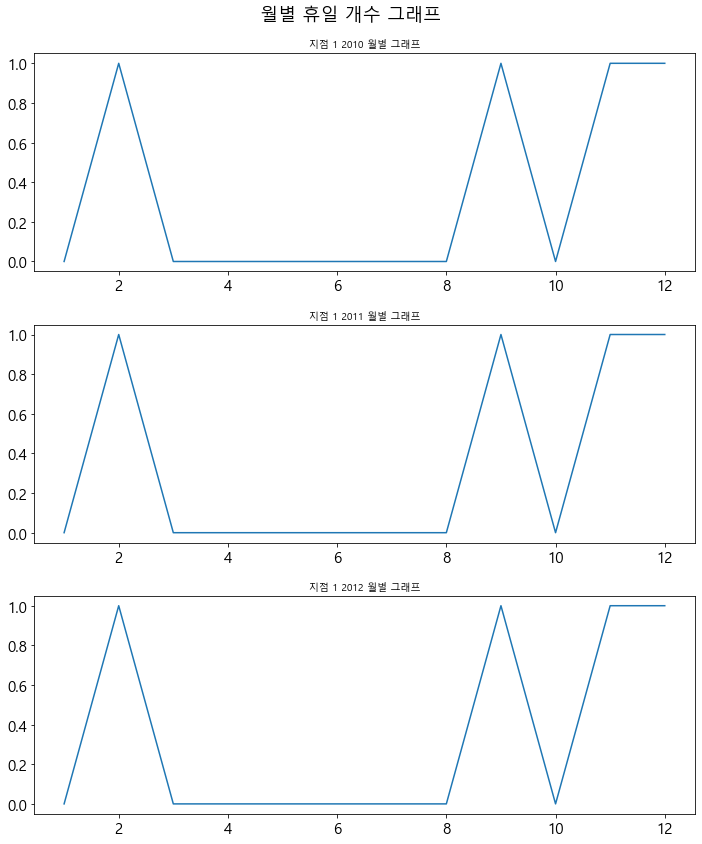

In [81]:
holi2_mon(store_1,1)

In [85]:
def Promotion_mon(data, i, j):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 Promotion{} 박스 그래프".format(j))
    g = sns.boxplot(x='Month', y='Promotion{}'.format(j), data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 박스 그래프'.format(i), size = 10)

    g = sns.boxplot(x='Month', y='Promotion{}'.format(j), data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 박스 그래프'.format(i), size = 10)
    
    g = sns.boxplot(x='Month', y='Promotion{}'.format(j), data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 박스 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

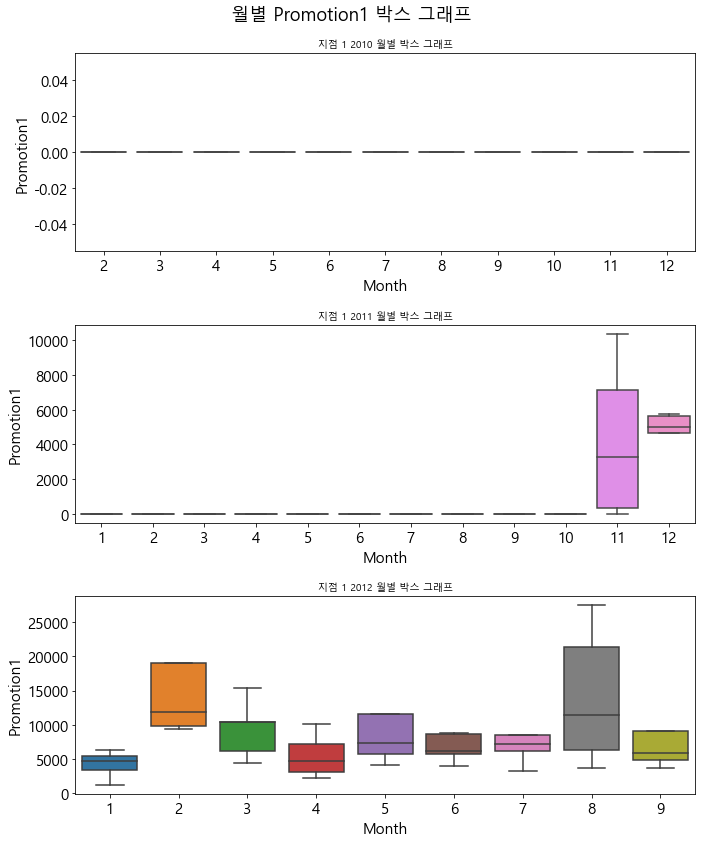

In [87]:
Promotion_mon(store_1,1,1)

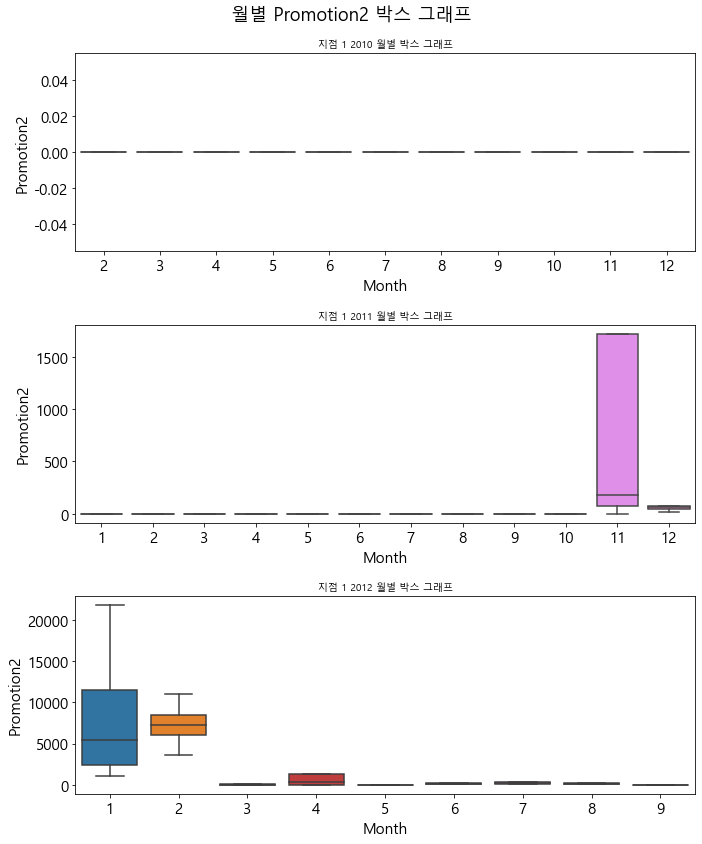

In [88]:
Promotion_mon(store_1,1,2)

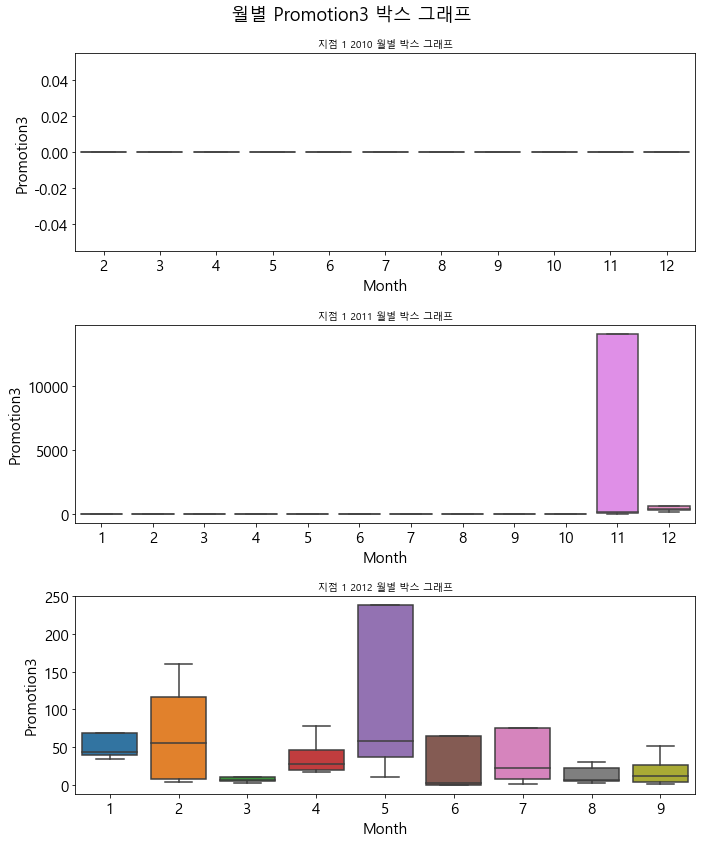

In [89]:
Promotion_mon(store_1,1,3)

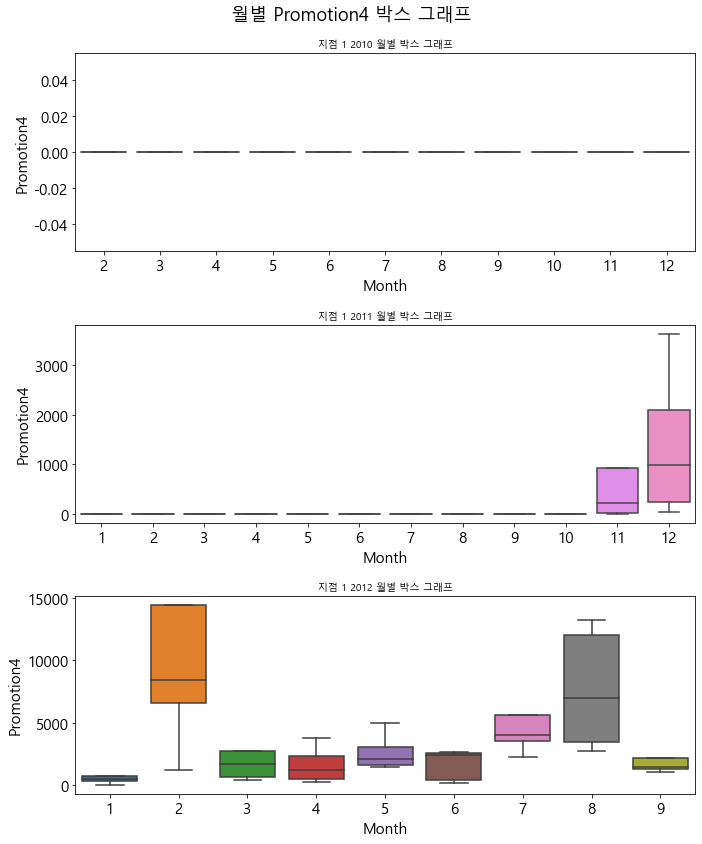

In [90]:
Promotion_mon(store_1,1,4)

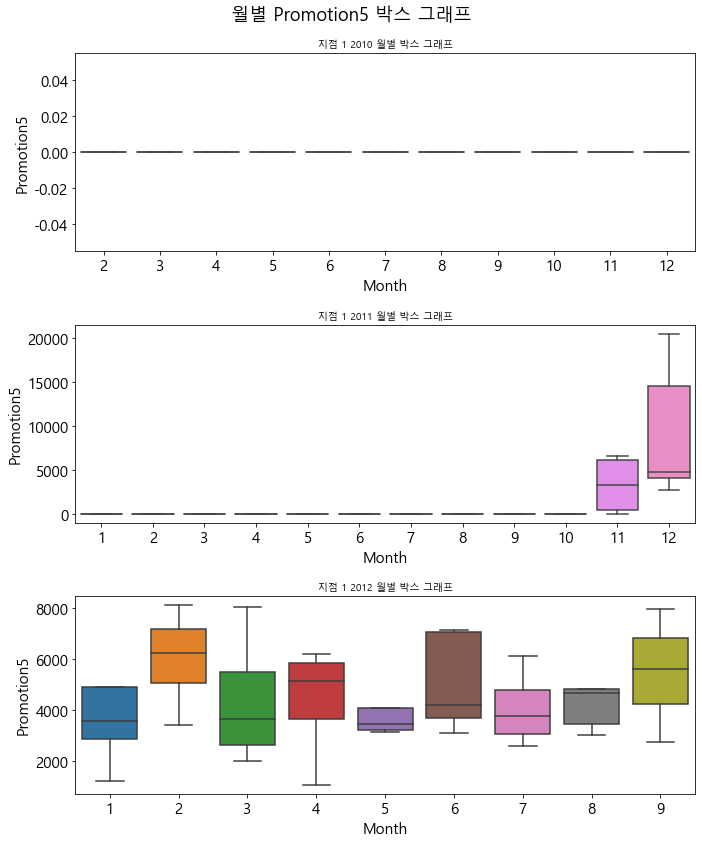

In [91]:
Promotion_mon(store_1,1,5)

- 워낙 Promotion1,2,3,4,5가 뒤죽박죽이라 분석이 어려움
- 따라서 Promotion1,2,3,4,5를 합침

In [93]:
def add_promotion(data):
    data['add_promotion'] = data['Promotion1']+data['Promotion2']+data['Promotion3']+data['Promotion4']+data['Promotion5']
    return data

In [96]:
new_store_1 = add_promotion(store_1)

In [97]:
new_store_1

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday,add_promotion
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5,2010,0,0.00
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12,2010,1,0.00
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19,2010,0,0.00
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26,2010,0,0.00
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5,2010,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,1,31/08/2012,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,6.908,False,1582083.40,8,31,2012,0,37809.35
135,136,1,07/09/2012,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,6.908,True,1661767.33,9,7,2012,1,12148.85
136,137,1,14/09/2012,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,6.908,False,1517428.87,9,14,2012,0,26754.14
137,138,1,21/09/2012,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,6.908,False,1506126.06,9,21,2012,0,13831.40


In [98]:
def Promotion_add_mon(data, i):
    data2 = data[data['Year']==2010]
    data3 = data[data['Year']==2011]
    data4 = data[data['Year']==2012]
    
    fig,axs = plt.subplots(3,1,figsize=(10,12))
    fig.suptitle("월별 Promotion 총합 박스 그래프")
    g = sns.boxplot(x='Month', y='add_promotion', data=data2, showfliers=False, ax=axs[0])
    axs[0].set_title('지점 {} 2010 월별 박스 그래프'.format(i), size = 10)

    g = sns.boxplot(x='Month', y='add_promotion', data=data3, showfliers=False, ax=axs[1])
    axs[1].set_title('지점 {} 2011 월별 박스 그래프'.format(i), size = 10)
    
    g = sns.boxplot(x='Month', y='add_promotion', data=data4, showfliers=False, ax=axs[2])
    axs[2].set_title('지점 {} 2012 월별 박스 그래프'.format(i), size = 10)
    
    plt.tight_layout()
    plt.show()

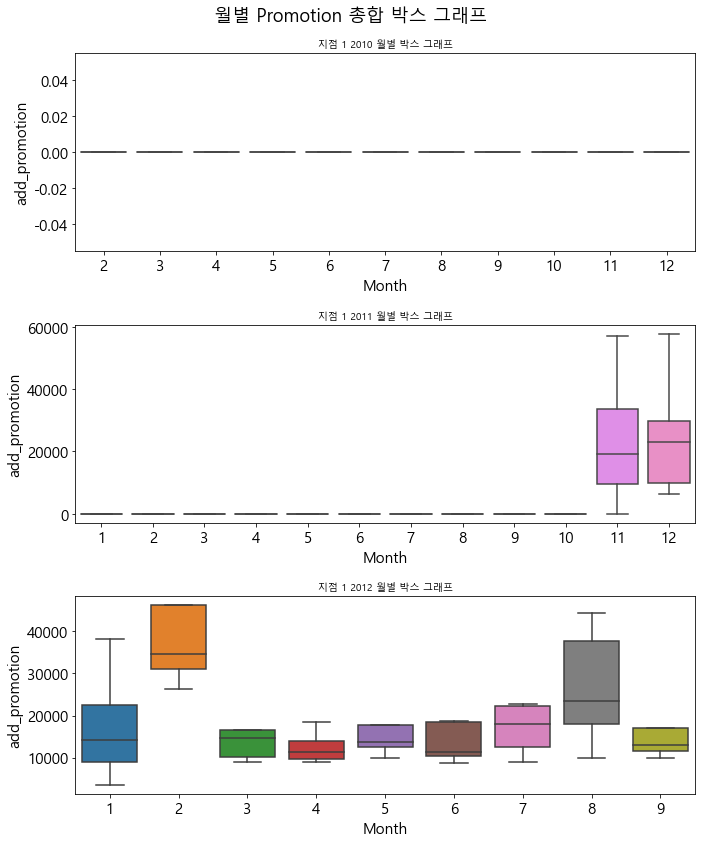

In [100]:
Promotion_add_mon(new_store_1,1)

- Weekly_Sales와 비교

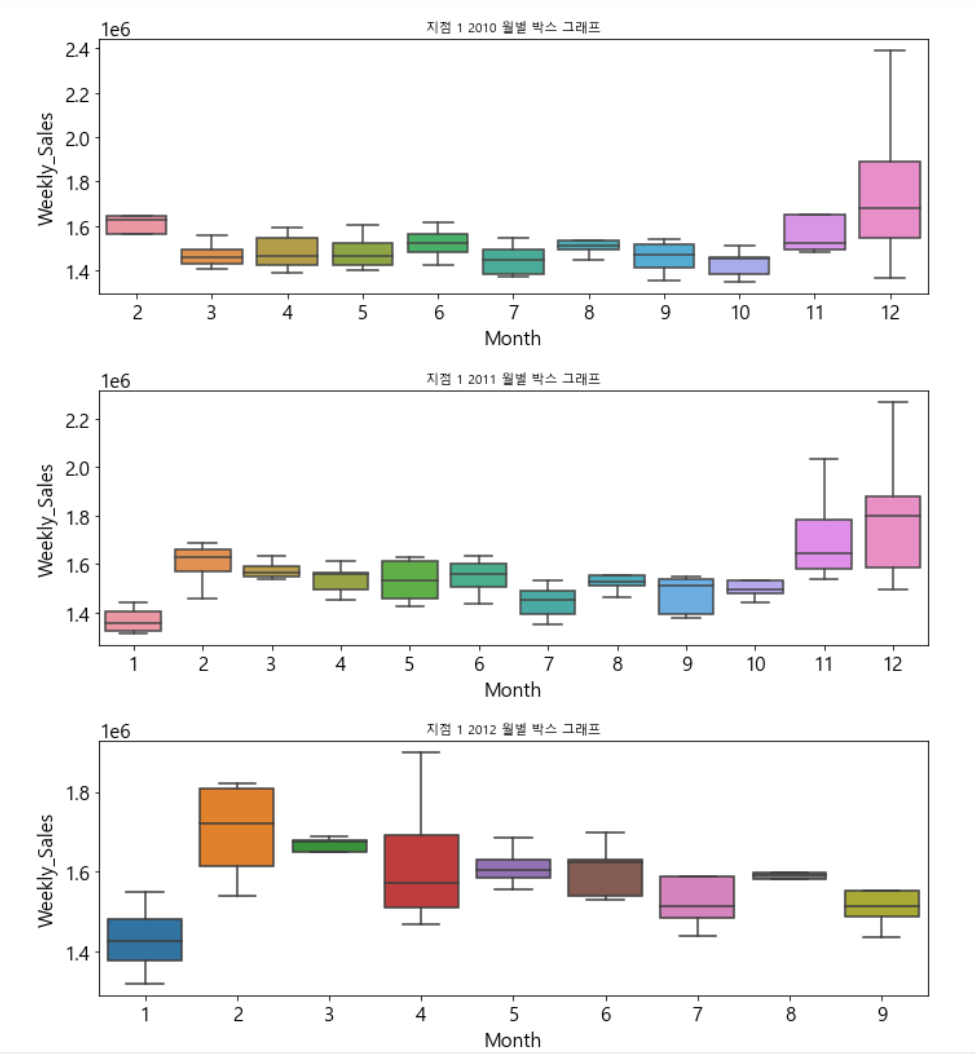

- 약간 비슷한 형태로 가는 것을 보아 완전히 관련없지는 않음

## 지점 4, 5, 28

In [82]:
store_4

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,418,4,05/02/2010,43.76,2.598,0.00,0.00,0.00,0.00,0.00,8.623,False,2135143.87,2,5,2010,0
1,419,4,12/02/2010,28.84,2.573,0.00,0.00,0.00,0.00,0.00,8.623,True,2188307.39,2,12,2010,1
2,420,4,19/02/2010,36.45,2.540,0.00,0.00,0.00,0.00,0.00,8.623,False,2049860.26,2,19,2010,0
3,421,4,26/02/2010,41.36,2.590,0.00,0.00,0.00,0.00,0.00,8.623,False,1925728.84,2,26,2010,0
4,422,4,05/03/2010,43.49,2.654,0.00,0.00,0.00,0.00,0.00,8.623,False,1971057.44,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,552,4,31/08/2012,76.47,3.646,19617.58,1.02,68.29,7187.73,6428.12,4.077,False,2081181.35,8,31,2012,0
135,553,4,07/09/2012,82.09,3.709,9082.61,16.00,59.06,7217.88,8026.47,4.077,True,2125104.72,9,7,2012,1
136,554,4,14/09/2012,68.20,3.706,13802.34,0.00,23.12,3643.77,12517.18,4.077,False,2117854.60,9,14,2012,0
137,555,4,21/09/2012,68.97,3.721,11214.89,5.73,16.84,6376.86,4417.13,4.077,False,2119438.53,9,21,2012,0


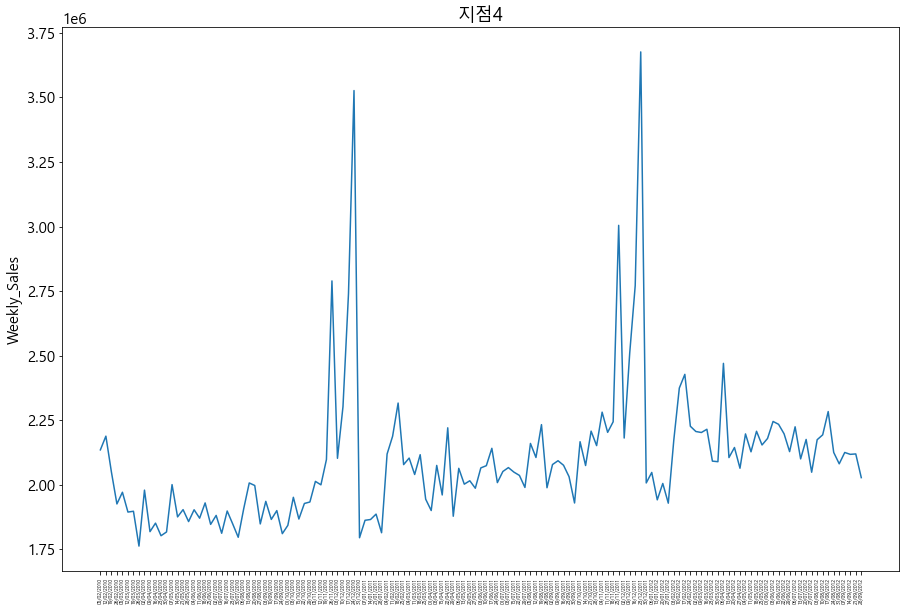

In [101]:
plt.figure(figsize=(15,10))
plt.plot(store_4['Date'],store_4['Weekly_Sales'])
plt.title("지점4")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90,size=5)
plt.show()

In [102]:
store_4.sort_values('Weekly_Sales')

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
7,425,4,26/03/2010,39.91,2.752,0.00,0.00,0.00,0.00,0.00,8.623,False,1762539.30,3,26,2010,0
47,465,4,31/12/2010,38.09,2.955,0.00,0.00,0.00,0.00,0.00,7.127,True,1794868.74,12,31,2010,1
25,443,4,30/07/2010,80.70,2.650,0.00,0.00,0.00,0.00,0.00,7.372,False,1796637.61,7,30,2010,0
11,429,4,23/04/2010,56.87,2.805,0.00,0.00,0.00,0.00,0.00,7.896,False,1802677.90,4,23,2010,0
33,451,4,24/09/2010,60.96,2.642,0.00,0.00,0.00,0.00,0.00,7.372,False,1810684.68,9,24,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,515,4,16/12/2011,36.44,3.149,2756.67,72.30,1790.15,777.65,10261.95,5.143,False,2771397.17,12,16,2011,0
42,460,4,26/11/2010,48.08,2.752,0.00,0.00,0.00,0.00,0.00,7.127,True,2789469.45,11,26,2010,1
94,512,4,25/11/2011,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,5.143,True,3004702.33,11,25,2011,1
46,464,4,24/12/2010,43.21,2.887,0.00,0.00,0.00,0.00,0.00,7.127,False,3526713.39,12,24,2010,0


- 똑같이 12월 25일 부근에서 매출이 가장 많음

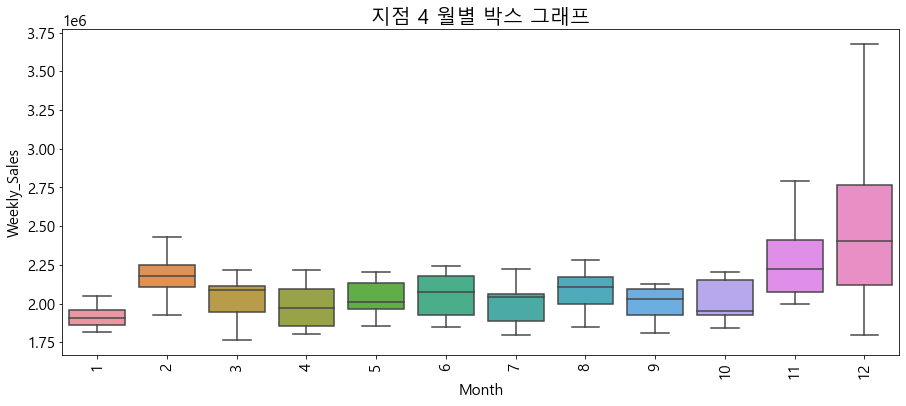

In [103]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Month', y='Weekly_Sales', data=store_4, showfliers=False)
g.set_title('지점 4 월별 박스 그래프', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

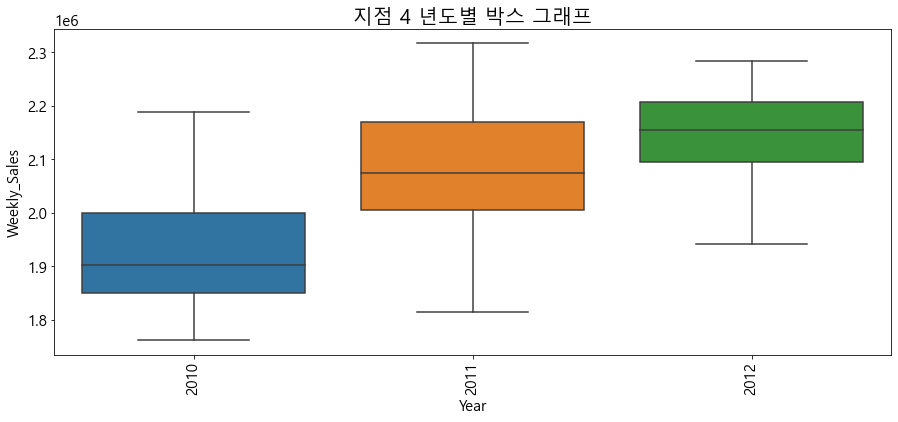

In [104]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Year', y='Weekly_Sales', data=store_4, showfliers=False)
g.set_title('지점 4 년도별 박스 그래프', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

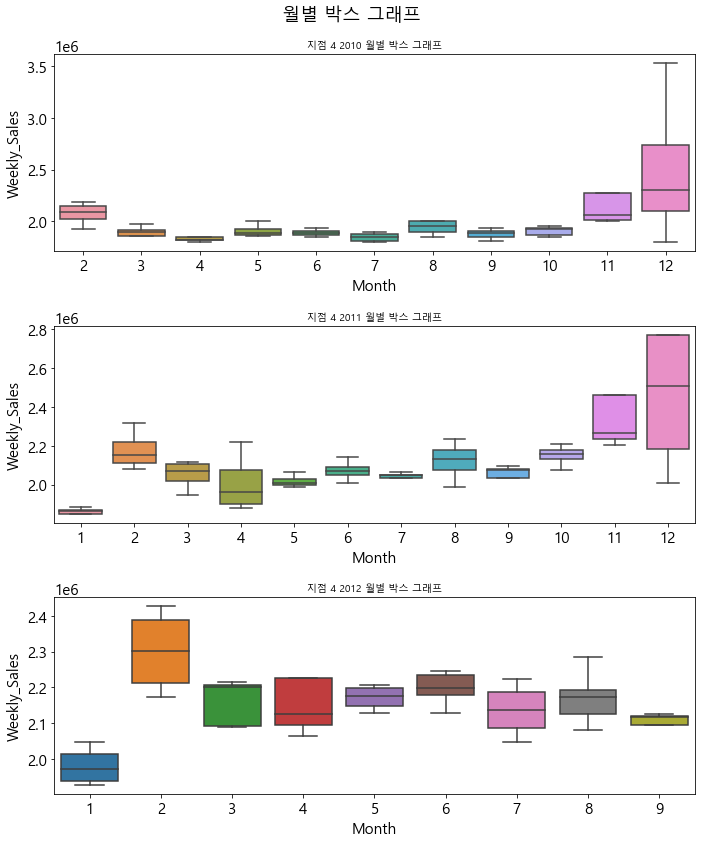

In [105]:
mon(store_4,4)

- 2월, 11월, 12월에 매출이 큰 것을 볼 수 있음

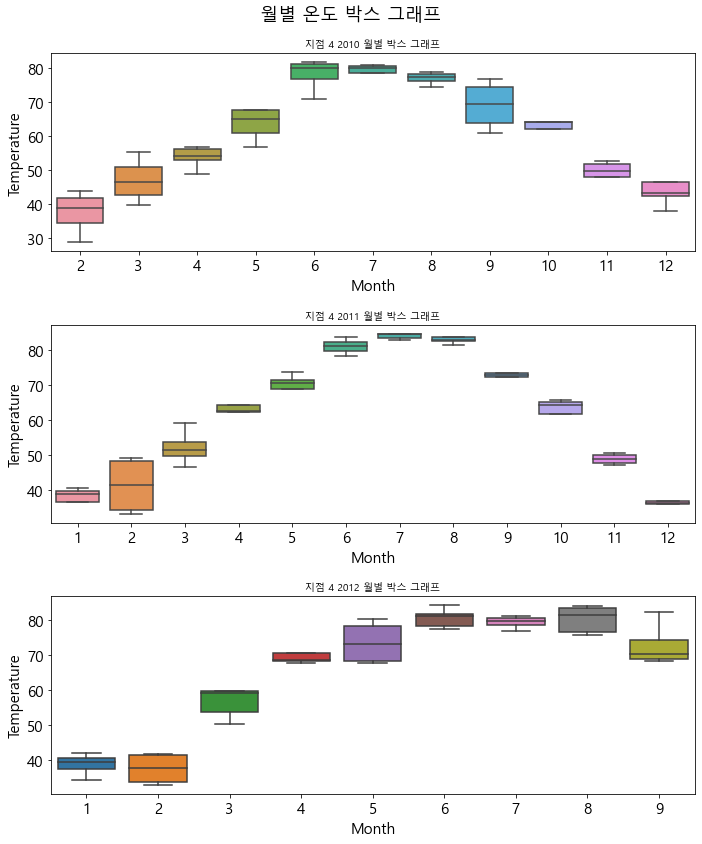

In [106]:
tem_mon(store_4,4)

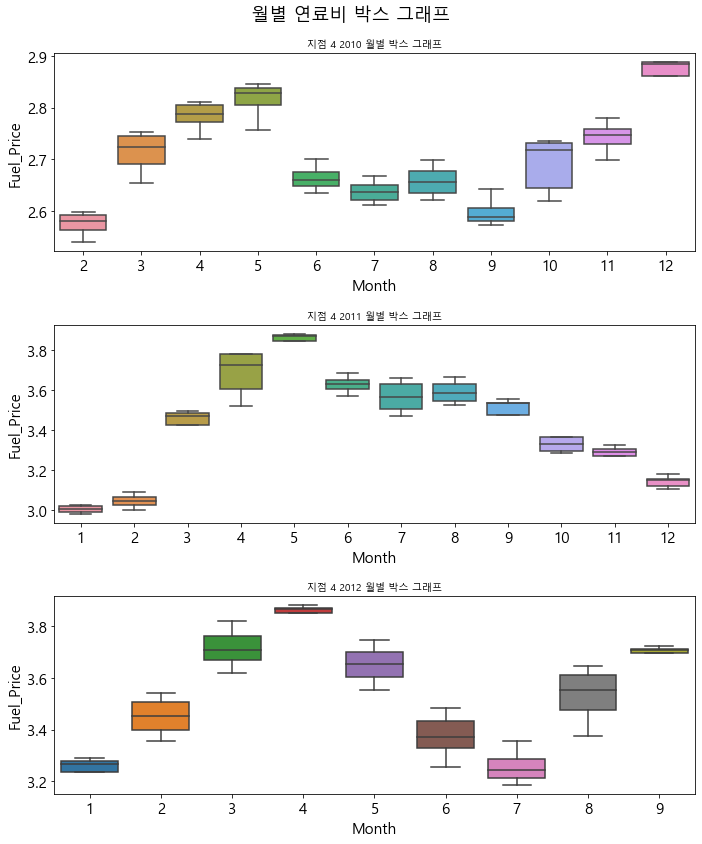

In [107]:
fuel_mon(store_4,4)

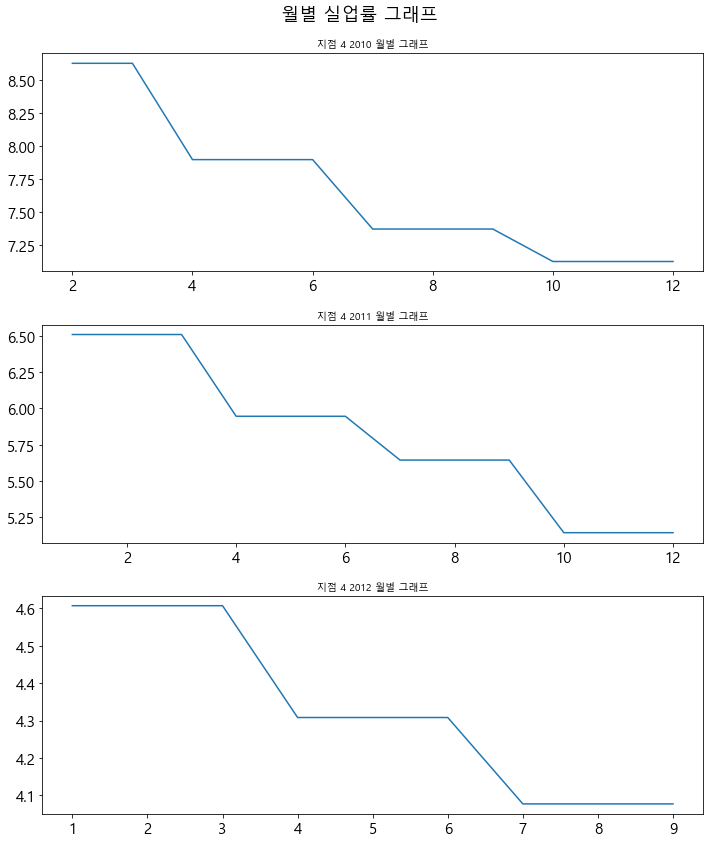

In [108]:
unem_mon(store_4,4)

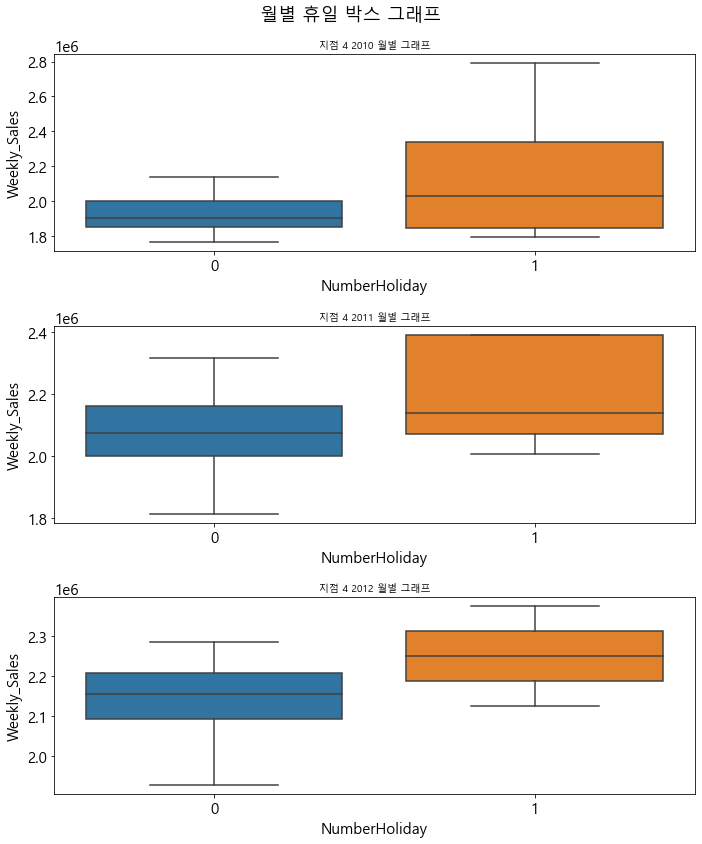

In [109]:
holi_mon(store_4,4)

- 휴일에 매출이 높은 것을 볼 수 있음

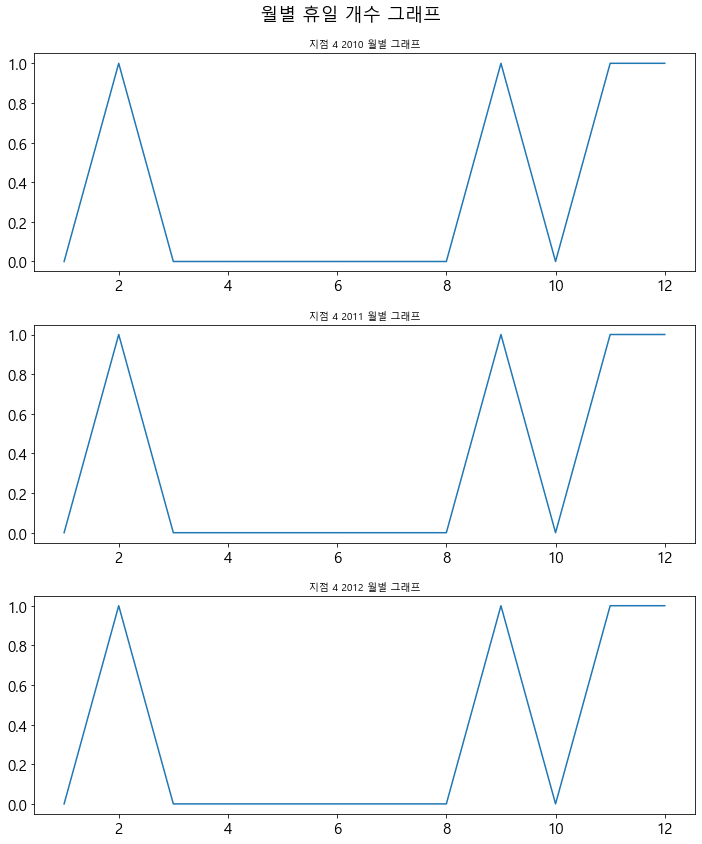

In [110]:
holi2_mon(store_4,4)

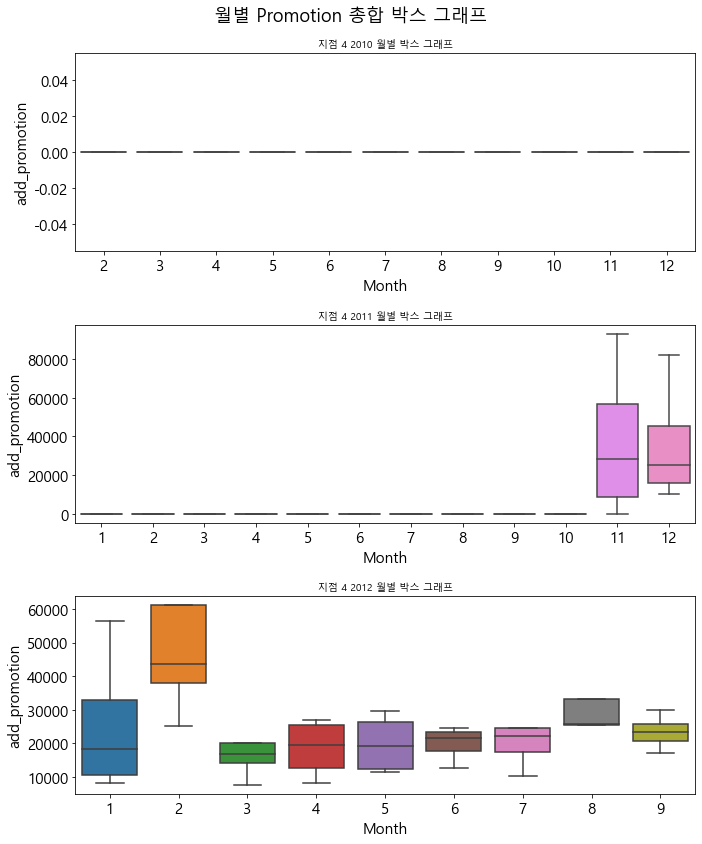

In [112]:
new_store_4 = add_promotion(store_4)
Promotion_add_mon(new_store_4,4)

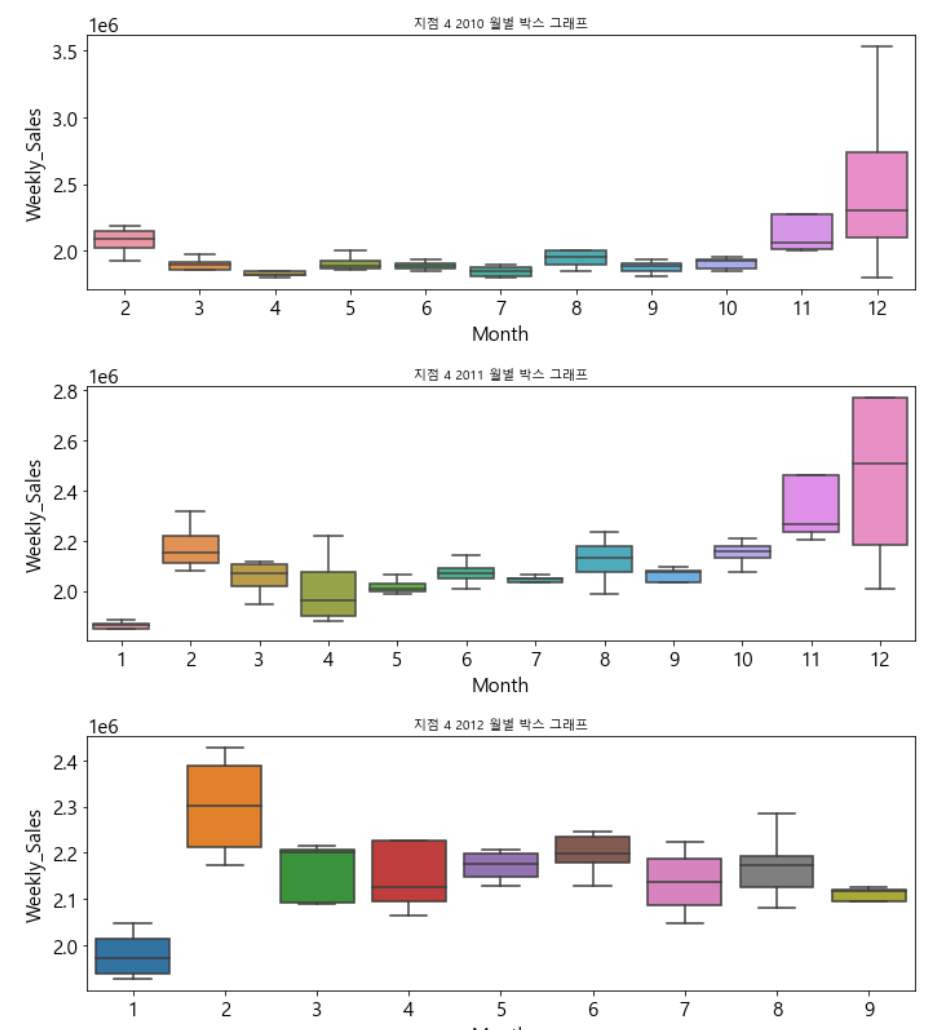

## 지점 5

In [113]:
store_5

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
0,557,5,05/02/2010,39.70,2.572,0.00,0.00,0.00,0.00,0.00,6.566,False,317173.10,2,5,2010,0
1,558,5,12/02/2010,39.81,2.548,0.00,0.00,0.00,0.00,0.00,6.566,True,311825.70,2,12,2010,1
2,559,5,19/02/2010,41.14,2.514,0.00,0.00,0.00,0.00,0.00,6.566,False,303447.57,2,19,2010,0
3,560,5,26/02/2010,46.70,2.561,0.00,0.00,0.00,0.00,0.00,6.566,False,270281.63,2,26,2010,0
4,561,5,05/03/2010,48.89,2.625,0.00,0.00,0.00,0.00,0.00,6.566,False,288855.71,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,691,5,31/08/2012,84.25,3.638,5211.69,49.00,13.00,2799.14,2740.48,5.603,False,344642.01,8,31,2012,0
135,692,5,07/09/2012,86.30,3.730,2797.26,1.90,9.61,968.75,2069.30,5.603,True,350648.91,9,7,2012,1
136,693,5,14/09/2012,76.65,3.717,2027.18,4.00,4.55,1354.97,3535.01,5.603,False,299800.67,9,14,2012,0
137,694,5,21/09/2012,71.09,3.721,3033.26,5.73,1.10,83.82,4579.05,5.603,False,307306.76,9,21,2012,0


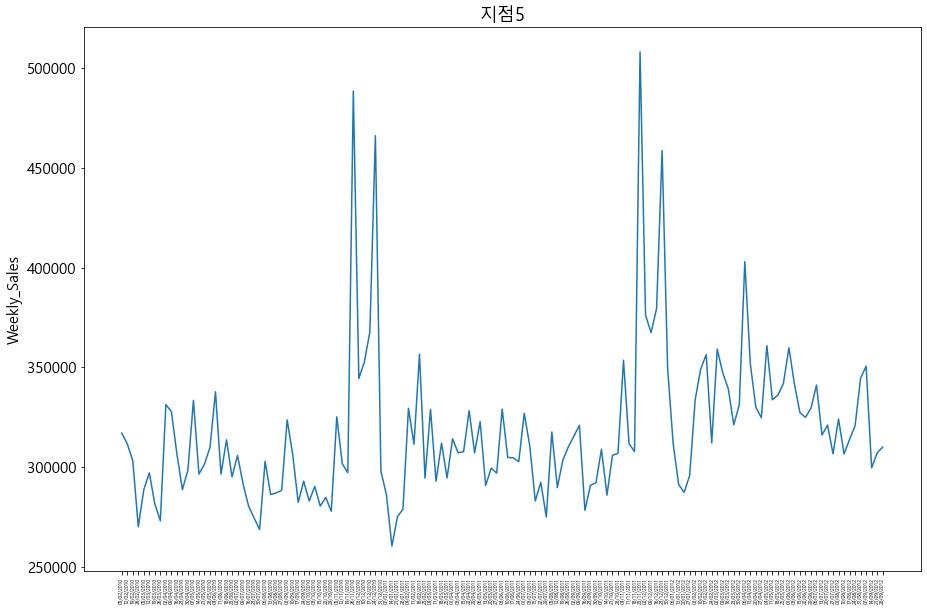

In [114]:
plt.figure(figsize=(15,10))
plt.plot(store_5['Date'],store_5['Weekly_Sales'])
plt.title("지점5")
plt.ylabel("Weekly_Sales")
plt.xticks(rotation=90,size=5)
plt.show()

In [115]:
store_5.sort_values('Weekly_Sales')

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday
49,606,5,14/01/2011,37.74,2.983,0.00,0.00,0.00,0.0,0.00,6.634,False,260636.71,1,14,2011,0
25,582,5,30/07/2010,82.46,2.640,0.00,0.00,0.00,0.0,0.00,6.496,False,268929.03,7,30,2010,0
3,560,5,26/02/2010,46.70,2.561,0.00,0.00,0.00,0.0,0.00,6.566,False,270281.63,2,26,2010,0
7,564,5,26/03/2010,52.47,2.732,0.00,0.00,0.00,0.0,0.00,6.566,False,273282.97,3,26,2010,0
24,581,5,23/07/2010,83.66,2.608,0.00,0.00,0.00,0.0,0.00,6.496,False,274742.63,7,23,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,670,5,06/04/2012,70.40,3.891,5174.35,0.00,6.48,1489.1,2264.89,5.801,False,402985.70,4,6,2012,0
98,655,5,23/12/2011,50.33,3.112,225.21,0.15,427.57,0.0,1443.04,6.300,False,458562.24,12,23,2011,0
46,603,5,24/12/2010,55.01,2.886,0.00,0.00,0.00,0.0,0.00,6.768,False,466010.25,12,24,2010,0
42,599,5,26/11/2010,66.15,2.735,0.00,0.00,0.00,0.0,0.00,6.768,True,488362.61,11,26,2010,1


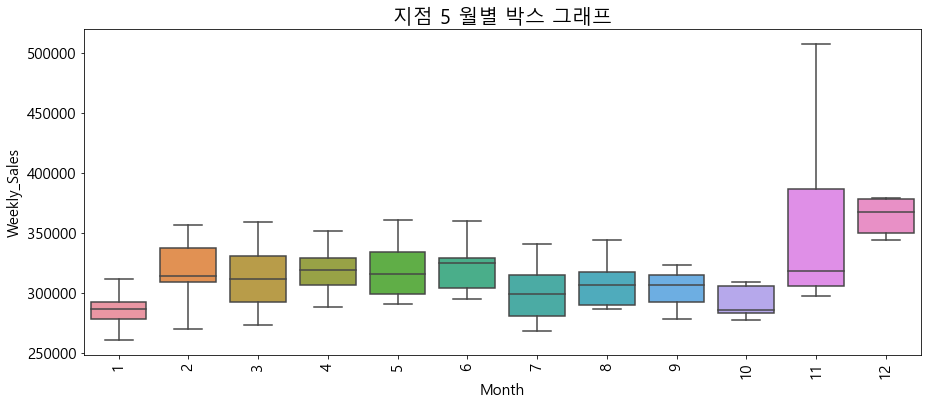

In [116]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Month', y='Weekly_Sales', data=store_5, showfliers=False)
g.set_title('지점 5 월별 박스 그래프', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

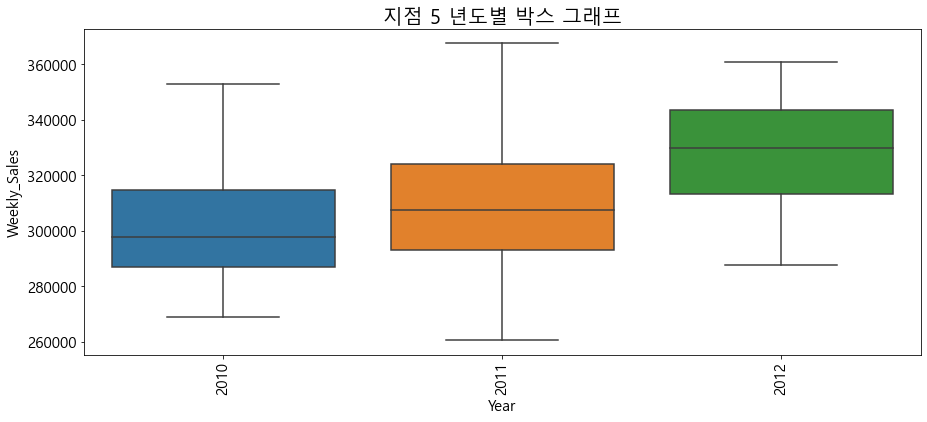

In [117]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
g = sns.boxplot(x='Year', y='Weekly_Sales', data=store_5, showfliers=False)
g.set_title('지점 5 년도별 박스 그래프', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

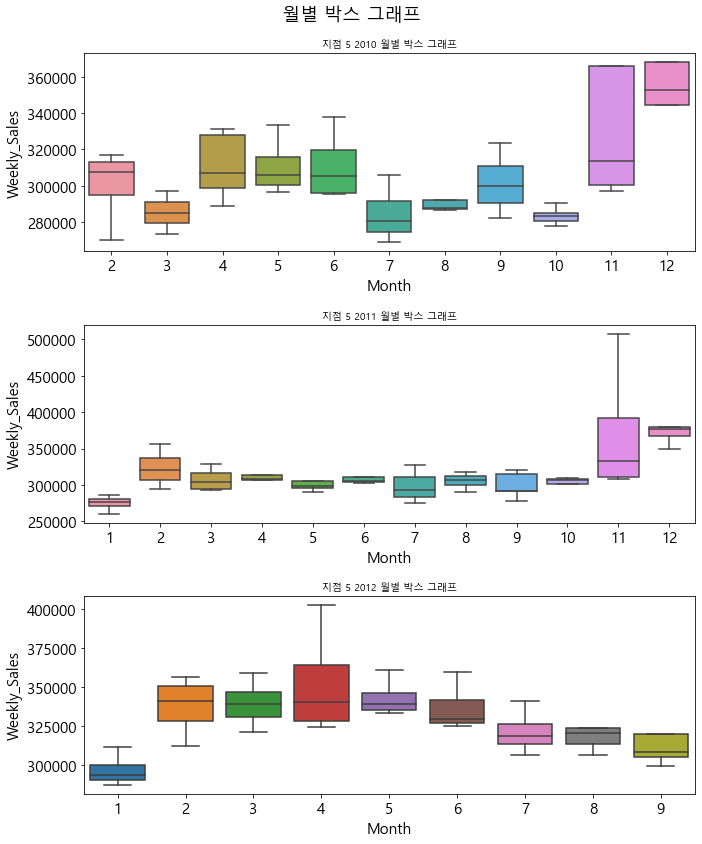

In [118]:
mon(store_5,5)

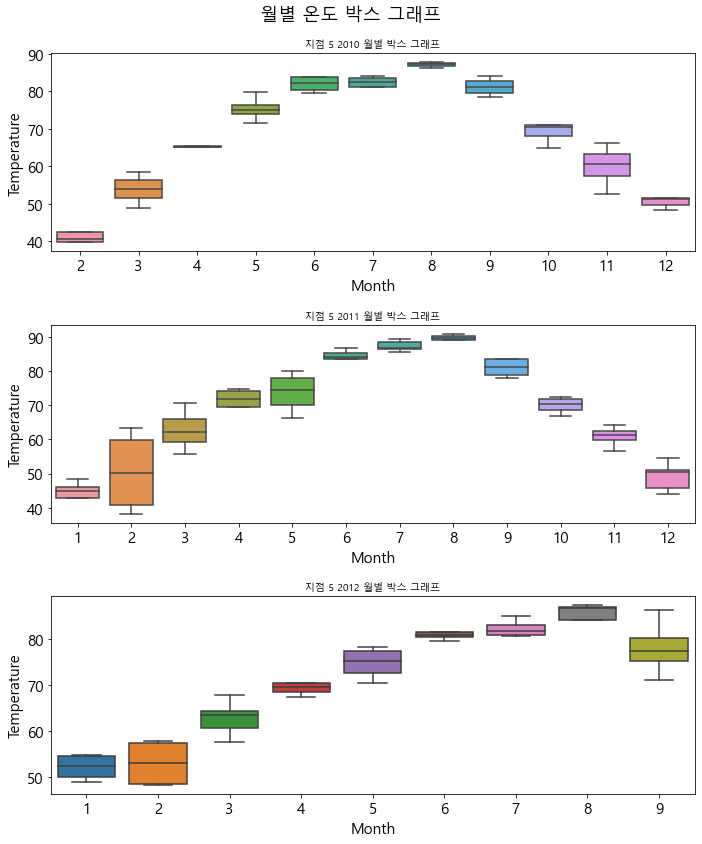

In [119]:
tem_mon(store_5,5)

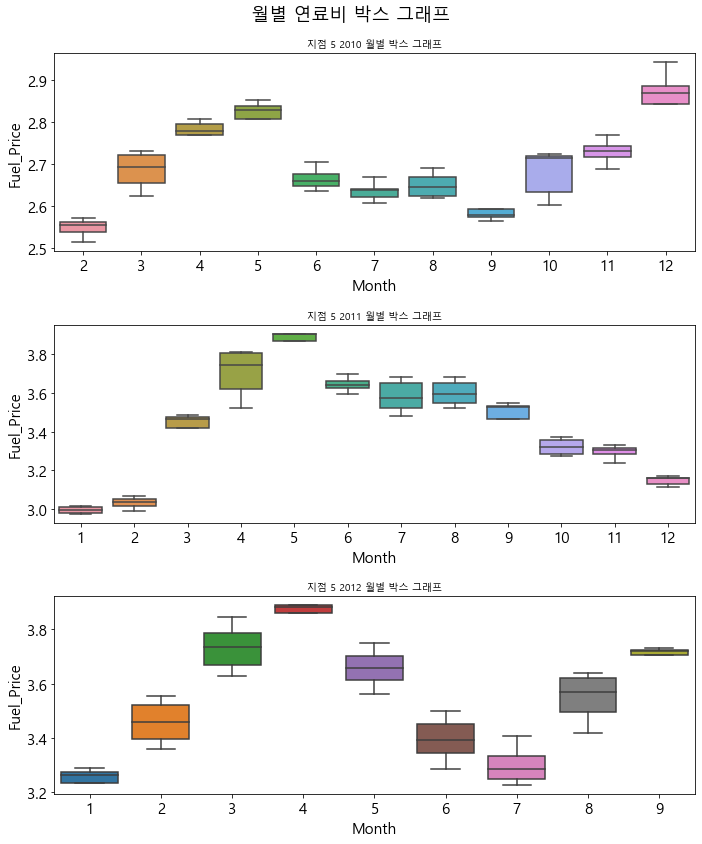

In [120]:
fuel_mon(store_5,5)

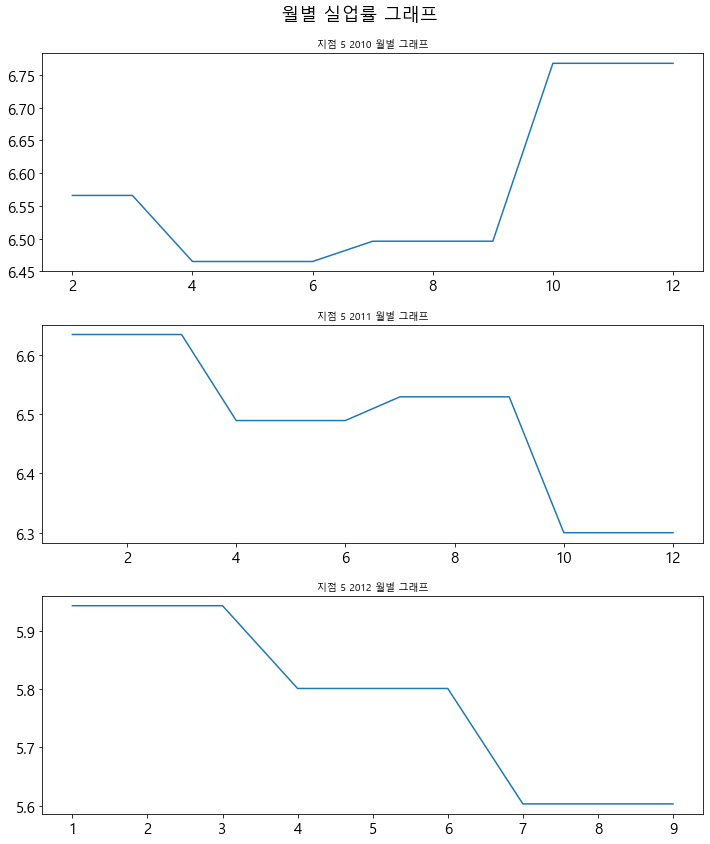

In [121]:
unem_mon(store_5,5)

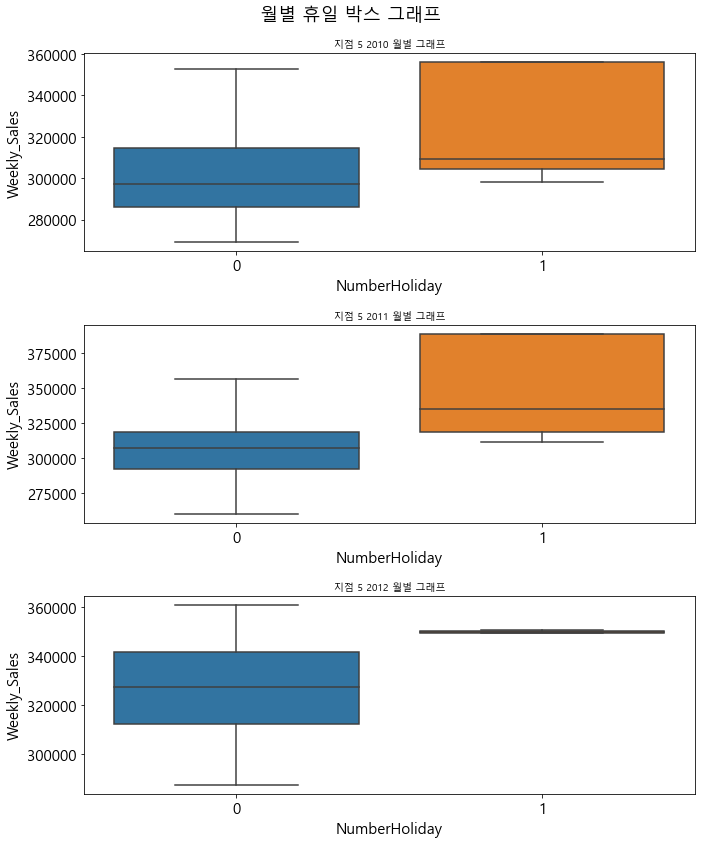

In [122]:
holi_mon(store_5,5)

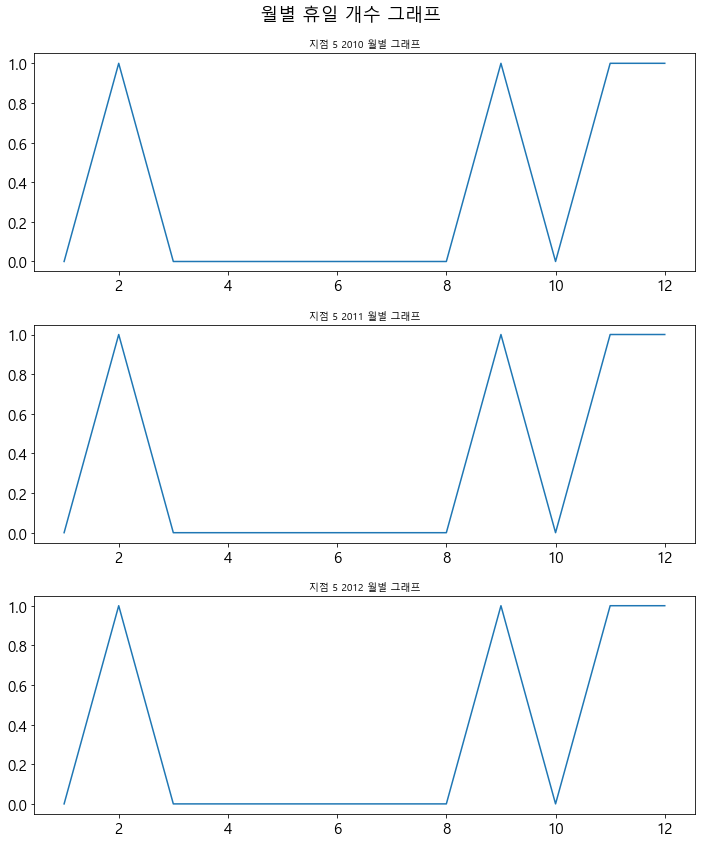

In [123]:
holi2_mon(store_5,5)

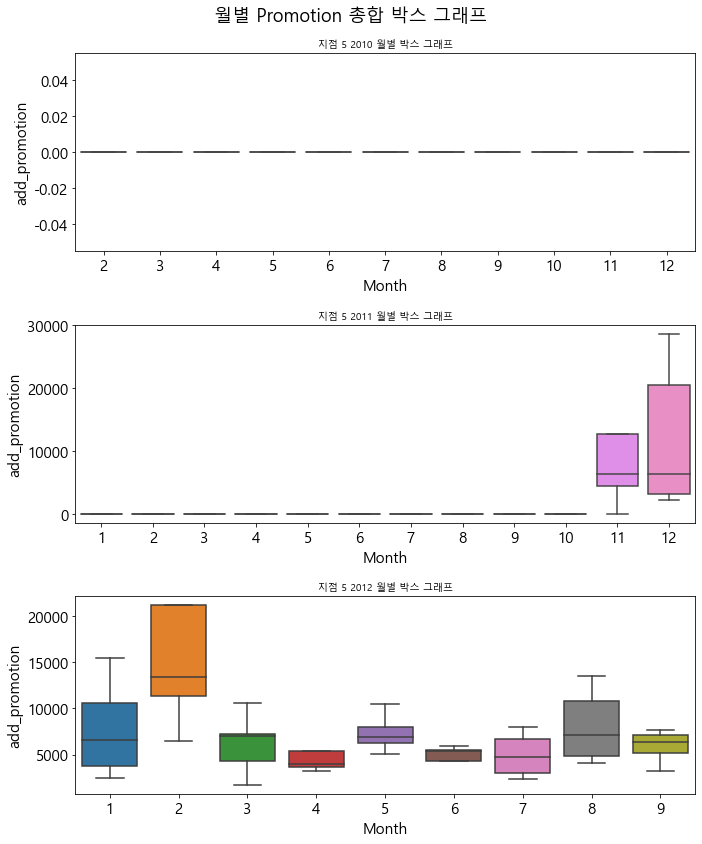

In [124]:
new_store_5 = add_promotion(store_5)
Promotion_add_mon(new_store_5,5)

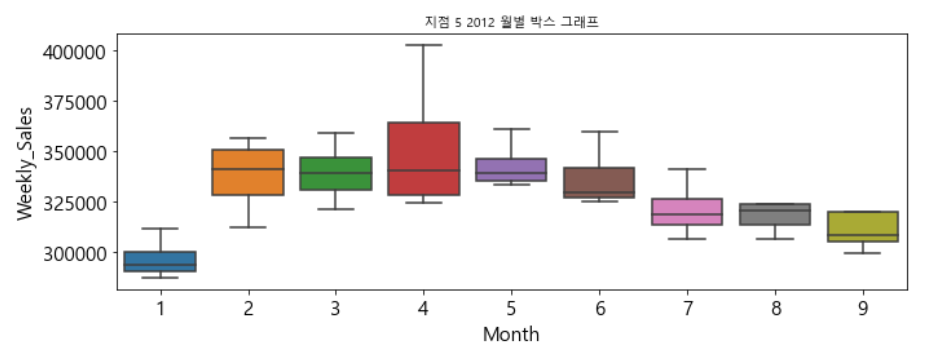

In [125]:
new_store_1

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday,add_promotion
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5,2010,0,0.00
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12,2010,1,0.00
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19,2010,0,0.00
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26,2010,0,0.00
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5,2010,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,1,31/08/2012,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,6.908,False,1582083.40,8,31,2012,0,37809.35
135,136,1,07/09/2012,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,6.908,True,1661767.33,9,7,2012,1,12148.85
136,137,1,14/09/2012,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,6.908,False,1517428.87,9,14,2012,0,26754.14
137,138,1,21/09/2012,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,6.908,False,1506126.06,9,21,2012,0,13831.40


# test 데이터

In [132]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Month,NumberHoliday,Day,Year
0,1,1,05/10/2012,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False,10,0,5,2012
1,2,1,12/10/2012,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False,10,0,12,2012
2,3,1,19/10/2012,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False,10,0,19,2012
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,10,0,26,2012
4,5,2,05/10/2012,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False,10,0,5,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False,10,0,26,2012
176,177,45,05/10/2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False,10,0,5,2012
177,178,45,12/10/2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False,10,0,12,2012
178,179,45,19/10/2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False,10,0,19,2012


- test를 보면 2012년 각 지점별 10/12, 10/19, 10/26로 되어 있음

# 학습

- 간단한 선형 모델인 릿지(Ridge) 및 라쏘(Lasso) 회귀 모델, 트리 기반 모델의 랜덤 포레스트, 부스팅 모델

- 이전에 promotion에 관련해 정규화 진행

In [128]:
train['add_promotion'] = train['Promotion1']+train['Promotion2']+train['Promotion3']+train['Promotion4']+train['Promotion5']

In [166]:
test['add_promotion'] = test['Promotion1']+test['Promotion2']+test['Promotion3']+test['Promotion4']+test['Promotion5']

In [145]:
# 정규화를 위해 sklearn의 StandardScaler를 사용합니다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train[['add_promotion']])

scaled = scaler.transform(train[['add_promotion']])

train['Scaled_promotion'] = scaled

In [167]:
scaler.fit(test[['add_promotion']])
scaled = scaler.transform(test[['add_promotion']])

test['Scaled_promotion'] = scaled

In [146]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Day,Year,NumberHoliday,add_promotion,Scaled_promotion
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,5,2010,0,0.00,-0.431006
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,12,2010,1,0.00,-0.431006
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,19,2010,0,0.00,-0.431006
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,26,2010,0,0.00,-0.431006
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,5,2010,0,0.00,-0.431006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,31,2012,0,34720.67,1.973596
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,7,2012,1,15000.35,0.607853
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,14,2012,0,20102.89,0.961232
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,21,2012,0,19654.50,0.930179


In [168]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Month,NumberHoliday,Day,Year,add_promotion,Scaled_promotion
0,1,1,05/10/2012,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,False,10,0,5,2012,15339.68,1.362270
1,2,1,12/10/2012,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,False,10,0,12,2012,8623.10,0.147310
2,3,1,19/10/2012,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,False,10,0,19,2012,3348.36,-0.806837
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,10,0,26,2012,4985.77,-0.510646
4,5,2,05/10/2012,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,False,10,0,5,2012,12928.57,0.926125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,False,10,0,26,2012,499.98,-1.322080
176,177,45,05/10/2012,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,False,10,0,5,2012,9659.00,0.334693
177,178,45,12/10/2012,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,False,10,0,12,2012,6554.03,-0.226964
178,179,45,19/10/2012,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,False,10,0,19,2012,3982.42,-0.692142


In [187]:
train_input = train.drop(columns=['Date','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5','IsHoliday','id','add_promotion'])

In [188]:
train_input = train_input.drop(columns=['Weekly_Sales'])

In [189]:
train_target = train['Weekly_Sales']

In [190]:
train_input

,Store,Temperature,Fuel_Price,Unemployment,Month,Day,Year,NumberHoliday,Scaled_promotion
0,1,42.31,2.572,8.106,2,5,2010,0,-0.431006
1,1,38.51,2.548,8.106,2,12,2010,1,-0.431006
2,1,39.93,2.514,8.106,2,19,2010,0,-0.431006
3,1,46.63,2.561,8.106,2,26,2010,0,-0.431006
4,1,46.50,2.625,8.106,3,5,2010,0,-0.431006
...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,8.684,8,31,2012,0,1.973596
6251,45,75.70,3.911,8.684,9,7,2012,1,0.607853
6252,45,67.87,3.948,8.684,9,14,2012,0,0.961232
6253,45,65.32,4.038,8.684,9,21,2012,0,0.930179


In [191]:
test_input = test.drop(columns=['Date','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5','IsHoliday','id','add_promotion'])

In [192]:
test_input

,Store,Temperature,Fuel_Price,Unemployment,Month,NumberHoliday,Day,Year,Scaled_promotion
0,1,68.55,3.617,6.573,10,0,5,2012,1.362270
1,1,62.99,3.601,6.573,10,0,12,2012,0.147310
2,1,67.97,3.594,6.573,10,0,19,2012,-0.806837
3,1,69.16,3.506,6.573,10,0,26,2012,-0.510646
4,2,70.27,3.617,6.170,10,0,5,2012,0.926125
...,...,...,...,...,...,...,...,...,...
175,44,46.97,3.755,5.217,10,0,26,2012,-1.322080
176,45,64.89,3.985,8.667,10,0,5,2012,0.334693
177,45,54.47,4.000,8.667,10,0,12,2012,-0.226964
178,45,56.47,3.969,8.667,10,0,19,2012,-0.692142


In [193]:
train_target

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6250     734297.87
6251     766512.66
6252     702238.27
6253     723086.20
6254     713173.95
Name: Weekly_Sales, Length: 6255, dtype: float64

In [133]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val                                           #get the ^

In [205]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# log 단위(1e+01)로 1.e-04 ~ 1.e+01 사이의 구간에 대해 parameter를 탐색한다.
lasso_params = {'alpha':np.logspace(-4,1,6)}
ridge_params = {'alpha':np.logspace(-5,1,6)}

# GridSearchCV를 이용하여 dict에 Lasso, Ridge 모델을 저장한다.
linear_models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=lasso_params).fit(
    train_input, train_target).best_estimator_,
    'Ridge': GridSearchCV(Ridge(), param_grid=ridge_params).fit(
    train_input, train_target).best_estimator_,}

In [206]:
linear_models

{'Lasso': Lasso(alpha=0.0001), 'Ridge': Ridge(alpha=0.630957344480193)}

- n_estimator : 결정 트리의 개수 
- max_features : 데이터의 feature를 참조할 비율, 개수를 뜻함
- max_depth : 트리의 깊이
- min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수
- min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수

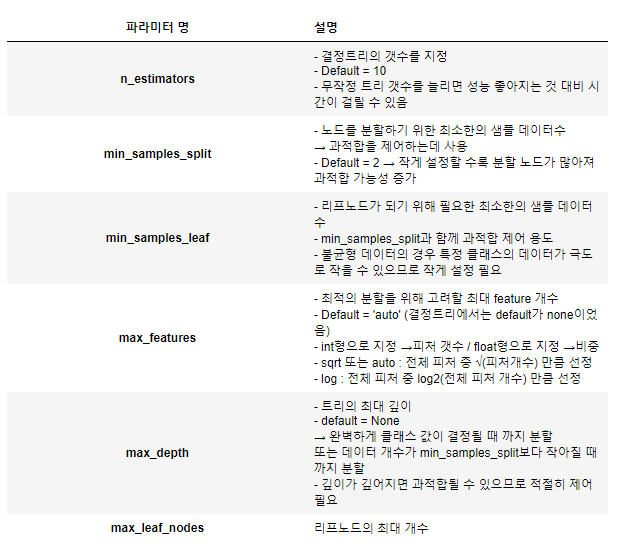

In [156]:
import time
from sklearn.ensemble import RandomForestRegressor
start = time.time() # 시작 시간 저장

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators' : [50,100,150,200,300,500,1000],
    'max_features' : ['auto','sqrt'],
    'max_depth' : [8,10,12,14,16],
    'min_samples_leaf' : [1,2,4,8],
    'min_samples_split' : [2,3,5,10]}

# GridSearchCV를 이용하여 dict에Randomforest 모델을 저장한다. 
RF_models = {
    'RF': GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
    ).fit(train_input, train_target).best_estimator_}

print(f'걸린시간 : {np.round(time.time()-start, 3)}초') # 현재시간 - 시작시간(단위 초)

걸린시간 : 3508.715초


In [165]:
train_input

,Store,Temperature,Fuel_Price,Unemployment,Month,Day,Year,NumberHoliday,add_promotion,Scaled_promotion
0,1,42.31,2.572,8.106,2,5,2010,0,0.00,-0.431006
1,1,38.51,2.548,8.106,2,12,2010,1,0.00,-0.431006
2,1,39.93,2.514,8.106,2,19,2010,0,0.00,-0.431006
3,1,46.63,2.561,8.106,2,26,2010,0,0.00,-0.431006
4,1,46.50,2.625,8.106,3,5,2010,0,0.00,-0.431006
...,...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,8.684,8,31,2012,0,34720.67,1.973596
6251,45,75.70,3.911,8.684,9,7,2012,1,15000.35,0.607853
6252,45,67.87,3.948,8.684,9,14,2012,0,20102.89,0.961232
6253,45,65.32,4.038,8.684,9,21,2012,0,19654.50,0.930179


In [172]:
RF_models['RF'].predict(test_input)

array([1650682.78932483, 1287302.33376307, 1190801.02894181,
       1199774.45544277, 1677860.26162728, 1675477.47748777,
       1307015.08982082, 1373354.59657342,  923032.39645421,
        924182.2895285 ,  926645.71950596, 1047536.52996031,
       1938078.11901647, 1940803.78289431, 1965176.53934748,
       1489572.12576937,  964964.25382315,  969268.4539832 ,
        960246.50212842,  937967.32837148, 1459299.00148777,
       1266705.19173087,  969318.17795358, 1015002.88001429,
       1009781.57929937, 1100441.58554205,  998256.59411387,
       1107057.72532647, 1092554.04191543, 1036694.51142564,
       1103025.28033541, 1087718.0606179 , 1113298.65507518,
       1098855.51702245, 1109128.89176222, 1087902.22960929,
       1617833.21771904, 1500698.00733331, 1051040.29927247,
       1490746.72325879, 1373572.50858507, 1412747.93352599,
        750096.16090547,  837653.85910678, 1287559.61205209,
       1073636.12254671, 1199573.52424966, 1303129.15808455,
       1577754.55889778,

In [182]:
submission = pd.read_csv('./dataset/dataset/sample_submission.csv')

In [183]:
submission

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
175,176,0
176,177,0
177,178,0
178,179,0


In [184]:
submission['Weekly_Sales'] = RF_models['RF'].predict(test_input)

In [185]:
submission

,id,Weekly_Sales
0,1,1.650683e+06
1,2,1.287302e+06
2,3,1.190801e+06
3,4,1.199774e+06
4,5,1.677860e+06
...,...,...
175,176,4.482141e+05
176,177,8.144471e+05
177,178,7.155533e+05
178,179,6.593885e+05


In [186]:
submission.to_csv('final_submission.csv',index=False)

In [157]:
import joblib

In [158]:
#save
joblib.dump(RF_models,'RF_model.pkl')

['RF_model.pkl']

In [159]:
#load
model2 = joblib.load('RF_model.pkl')

## XGBoost

- n_estimators : default = 100, 트리 모델의 갯수
- early_stopping_rounds : 최대한 몇 개의 트리를 완성할 것인지
- learning_rate : default = 0.1, 학습 단계별로 이전 결과를 얼마나 반영할 지
- min_child_weight : default = 1, child에서 필요한 모든 관측치에 대한 가중치의 최소합
- max_depth : default = 6, 트리의 최대 깊이를 뜻하며 일반적으로 3 ~ 10의 값
- gamma : default = 0, 트리에서 추가적으로 가지를 나눌지 말지 결정하는 최소 손실 감소 값
- subsample : default = 1, 각 트리마다 데이터 샘플링 비율 over-fitting 방지
- colsample_bytree : default = 1, 각 트리마다 feature 샘플링 비율
- reg_lamda : default = 1 , L2 규제 (Ridge)
- reg_alpha : default = 0, L1 규제 (Lasso)
- scale_pos_weight : default = 1, 데이터가 불균형 할 때 사용

In [195]:
import xgboost as xgb
start = time.time() # 시작 시간 저장

# xgboost parameter space를 정의한다.
XGB_params = {
    'min_child_weight' : [1,3,5,10],
    'gamma' : [0.3,0.5,1,1.5,2.5],
    'subsample' : [0.6,0.8,1.0,1.2],
    'colsample_bytree' : [0.6,0.8,1.0],
    'max_depth' : [3,4,5,7,10]}


# GridSearchCV를 통해 parameter를 탐색하게 정의한다.
XGB_gridsearch = GridSearchCV(xgb.XGBRegressor(random_state=42),
                                 param_grid=XGB_params, n_jobs=-1)

# 모델 학습
XGB_gridsearch.fit(train_input, train_target)

print(f'걸린시간 : {np.round(time.time()-start,3)}초') # 현재시간 - 시작시간(단위 초)

C:\Users\hansol\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\hansol\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.75156633 -0.84864321 -0.83035271 ... -1.12055525 -1.24446902
         nan]
  warnings.warn(
C:\Users\hansol\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


걸린시간 : 713.879초


In [196]:
#save
joblib.dump(XGB_gridsearch,'XGB_model.pkl')

['XGB_model.pkl']

In [197]:
#load
model3 = joblib.load('XGB_model.pkl')

In [200]:
model3

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=No

In [199]:
model3.predict(test_input)

C:\Users\hansol\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([1438077.4 , 1443612.1 , 1326038.4 , 1309951.4 , 1711008.5 ,
       1794940.8 , 1647030.6 , 1587040.5 ,  260765.4 ,  248232.67,
        261184.44,  257341.86, 1739449.9 , 1975896.  , 1900812.8 ,
       1908507.4 ,  647151.1 ,  654083.75,  601965.75,  644776.5 ,
       1425743.2 , 1615359.  , 1169113.2 , 1371863.6 ,  526908.6 ,
        681010.75,  519873.34,  654856.5 ,  817249.25,  680566.94,
        987514.5 , 1028529.4 ,  858703.4 ,  772600.94,  764641.94,
        811967.25, 1723992.8 , 1829885.2 , 1607849.  , 1560804.2 ,
       1305258.4 , 1264981.8 , 1065739.5 , 1237736.1 , 1215937.6 ,
       1166507.9 , 1166525.4 , 1299141.6 , 1859095.9 , 1735729.2 ,
       1754286.5 , 1769221.9 , 1998204.1 , 2038802.1 , 1887280.5 ,
       2071303.8 ,  458254.25,  477189.94,  747367.6 ,  574564.4 ,
        512282.9 ,  426941.1 ,  924458.25,  894515.  ,  766893.7 ,
        865752.94,  942167.56,  661939.9 , 1344062.9 , 1136248.2 ,
       1233350.2 , 1141323.6 , 1527734.  , 1500330.6 , 1254546

In [201]:
submission['Weekly_Sales'] = model3.predict(test_input)

C:\Users\hansol\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [202]:
submission

,id,Weekly_Sales
0,1,1.438077e+06
1,2,1.443612e+06
2,3,1.326038e+06
3,4,1.309951e+06
4,5,1.711008e+06
...,...,...
175,176,3.910261e+05
176,177,8.752240e+05
177,178,7.740758e+05
178,179,8.650942e+05


In [203]:
submission.to_csv('final_submission2.csv',index=False)

---

## Linear로 예측

In [207]:
linear_models['Ridge'].predict(test_input)

array([3.51012158e+08, 3.49258582e+08, 3.47531936e+08, 3.45991797e+08,
       3.50933119e+08, 3.49388879e+08, 3.47681233e+08, 3.46121487e+08,
       3.50625327e+08, 3.49025051e+08, 3.47516778e+08, 3.45837001e+08,
       3.51066898e+08, 3.49390777e+08, 3.47880997e+08, 3.46144704e+08,
       3.50681230e+08, 3.49126005e+08, 3.47446944e+08, 3.45876195e+08,
       3.51081137e+08, 3.49284695e+08, 3.47549953e+08, 3.46061339e+08,
       3.50730508e+08, 3.49018779e+08, 3.47605011e+08, 3.45960827e+08,
       3.50719539e+08, 3.49121110e+08, 3.47522742e+08, 3.45925276e+08,
       3.50645516e+08, 3.49031997e+08, 3.47463320e+08, 3.45831501e+08,
       3.51299577e+08, 3.49437014e+08, 3.47717385e+08, 3.46288132e+08,
       3.50806834e+08, 3.49326474e+08, 3.47463281e+08, 3.45986276e+08,
       3.50998297e+08, 3.49207778e+08, 3.47574227e+08, 3.46455357e+08,
       3.51015724e+08, 3.49325802e+08, 3.47670276e+08, 3.46326473e+08,
       3.50919852e+08, 3.49236499e+08, 3.47599869e+08, 3.46105624e+08,
      

In [208]:
linear_models['Lasso'].predict(test_input)

array([3.51574240e+08, 3.49818025e+08, 3.48088769e+08, 3.46546077e+08,
       3.51495177e+08, 3.49948400e+08, 3.48238156e+08, 3.46675848e+08,
       3.51187239e+08, 3.49584406e+08, 3.48073633e+08, 3.46391232e+08,
       3.51629072e+08, 3.49950350e+08, 3.48438080e+08, 3.46699128e+08,
       3.51243194e+08, 3.49685433e+08, 3.48003784e+08, 3.46430467e+08,
       3.51643314e+08, 3.49844211e+08, 3.48106854e+08, 3.46615716e+08,
       3.51292519e+08, 3.49578170e+08, 3.48161947e+08, 3.46515164e+08,
       3.51281540e+08, 3.49680550e+08, 3.48079640e+08, 3.46479593e+08,
       3.51207494e+08, 3.49591408e+08, 3.48020204e+08, 3.46385786e+08,
       3.51862092e+08, 3.49996983e+08, 3.48274734e+08, 3.46842956e+08,
       3.51368897e+08, 3.49886040e+08, 3.48020166e+08, 3.46540640e+08,
       3.51560547e+08, 3.49767584e+08, 3.48131456e+08, 3.47010219e+08,
       3.51577986e+08, 3.49885456e+08, 3.48227344e+08, 3.46881108e+08,
       3.51482094e+08, 3.49796146e+08, 3.48156939e+08, 3.46660166e+08,
      

In [209]:
submission['Weekly_Sales'] = linear_models['Ridge'].predict(test_input)
submission.to_csv('Ridge_submissin.csv',index=False)

In [210]:
submission['Weekly_Sales'] = linear_models['Lasso'].predict(test_input)
submission.to_csv('Lasso_submissin.csv',index=False)

---

In [138]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model = LinearRegression()

In [139]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# 전처리 하기 전 칼럼들을 제거합니다.
train = train.drop(columns=['Date','IsHoliday'])
test = test.drop(columns=['Date','IsHoliday'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train[['Weekly_Sales']]

In [140]:
x_train

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,Month,Day,Year,NumberHoliday
0,1,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,2,5,2010,0
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,2,12,2010,1
2,1,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,2,19,2010,0
3,1,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,2,26,2010,0
4,1,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,3,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,8,31,2012,0
6251,45,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,9,7,2012,1
6252,45,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,9,14,2012,0
6253,45,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,9,21,2012,0


In [141]:
y_train

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6250,734297.87
6251,766512.66
6252,702238.27
6253,723086.20


In [142]:
# 모델 학습
model.fit(x_train,y_train)

LinearRegression()

In [143]:
test

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,Month,NumberHoliday,Day,Year
0,1,68.55,3.617,8077.89,0.00,18.22,3617.43,3626.14,6.573,10,0,5,2012
1,1,62.99,3.601,2086.18,0.00,8.11,602.36,5926.45,6.573,10,0,12,2012
2,1,67.97,3.594,950.33,0.00,4.93,80.25,2312.85,6.573,10,0,19,2012
3,1,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,10,0,26,2012
4,2,70.27,3.617,6037.76,0.00,10.04,3027.37,3853.40,6.170,10,0,5,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,44,46.97,3.755,38.65,2.61,0.98,0.00,457.74,5.217,10,0,26,2012
176,45,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,8.667,10,0,5,2012
177,45,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,8.667,10,0,12,2012
178,45,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,8.667,10,0,19,2012


In [144]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[[4.78921630e+08]
 [4.77073786e+08]
 [4.75170366e+08]
 [4.73355372e+08]
 [4.78879302e+08]
 [4.77168661e+08]
 [4.75235138e+08]
 [4.73461950e+08]
 [4.78721827e+08]
 [4.76899415e+08]]


In [145]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,Weekly_Sales
0,1,4.789216e+08
1,2,4.770738e+08
2,3,4.751704e+08
3,4,4.733554e+08
4,5,4.788793e+08


In [146]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission.csv',index = False)

---

- day를 week로 변경
- temperature를 정규화하자

### 코드2

In [197]:
# 정규화를 위해 sklearn의 StandardScaler를 사용합니다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 학습용 데이터를 이용해 scaler를 학습시킵니다.
scaler.fit(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

# 학습된 scaler를 사용해 데이터를 변환합니다.
scaled = scaler.transform(train[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

# 변환된 값을 새로운 column에 할당합니다.
train[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

# 데이터를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,...,Weekly_Sales,Month,Day,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,...,1643690.90,2,5,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,...,1641957.44,2,12,2010,1,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,...,1611968.17,2,19,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,...,1409727.59,2,26,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,...,1554806.68,3,5,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,...,734297.87,8,31,2012,0,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,...,766512.66,9,7,2012,1,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,...,702238.27,9,14,2012,0,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,...,723086.20,9,21,2012,0,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [198]:
# Promotion 칼럼들을 제거합니다.
train = train.drop(columns=['IsHoliday','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

train

,id,Store,Date,Temperature,Fuel_Price,Unemployment,Weekly_Sales,Month,Day,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,05/02/2010,42.31,2.572,8.106,1643690.90,2,5,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,2,1,12/02/2010,38.51,2.548,8.106,1641957.44,2,12,2010,1,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,3,1,19/02/2010,39.93,2.514,8.106,1611968.17,2,19,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,4,1,26/02/2010,46.63,2.561,8.106,1409727.59,2,26,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,5,1,05/03/2010,46.50,2.625,8.106,1554806.68,3,5,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,8.684,734297.87,8,31,2012,0,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,6252,45,07/09/2012,75.70,3.911,8.684,766512.66,9,7,2012,1,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,6253,45,14/09/2012,67.87,3.948,8.684,702238.27,9,14,2012,0,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,6254,45,21/09/2012,65.32,4.038,8.684,723086.20,9,21,2012,0,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [199]:
# 결측치 처리
test = test.fillna(0)

# Promotion Scaling
scaled = scaler.transform(test[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']])

test[['Scaled_Promotion1','Scaled_Promotion2',
       'Scaled_Promotion3','Scaled_Promotion4',
       'Scaled_Promotion5']] = scaled

test = test.drop(columns=['IsHoliday','Promotion1','Promotion2','Promotion3','Promotion4','Promotion5'])

# 최종 확인
test

,id,Store,Date,Temperature,Fuel_Price,Unemployment,Month,NumberHoliday,Day,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,1,05/10/2012,68.55,3.617,6.573,10,0,5,2012,0.956583,-0.170211,-0.079007,0.686920,0.509844
1,2,1,12/10/2012,62.99,3.601,6.573,10,0,12,2012,-0.053718,-0.170211,-0.080897,-0.106760,1.068815
2,3,1,19/10/2012,67.97,3.594,6.573,10,0,19,2012,-0.245241,-0.170211,-0.081492,-0.244199,0.190716
3,4,1,26/10/2012,69.16,3.506,6.573,10,0,26,2012,0.030535,-0.163792,-0.081292,0.012961,-0.054187
4,5,2,05/10/2012,70.27,3.617,6.170,10,0,5,2012,0.612584,-0.170211,-0.080536,0.531594,0.565067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,5.217,10,0,26,2012,-0.398965,-0.169683,-0.082230,-0.265323,-0.260073
176,177,45,05/10/2012,64.89,3.985,8.667,10,0,5,2012,0.445482,-0.170211,-0.078895,0.327864,0.197316
177,178,45,12/10/2012,54.47,4.000,8.667,10,0,12,2012,-0.075621,-0.170211,-0.080938,-0.107560,0.598392
178,179,45,19/10/2012,56.47,3.969,8.667,10,0,19,2012,-0.067571,-0.170211,-0.081819,-0.150097,0.002305


- 간단한 선형 모델인 릿지(Ridge) 및 라쏘(Lasso) 회귀 모델, 트리 기반 모델의 랜덤 포레스트, 부스팅 모델

In [200]:
from sklearn.ensemble import RandomForestRegressor

# 모델 선언
model = RandomForestRegressor()

In [201]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

In [204]:
x_train = x_train.drop(columns=['Date'])

In [205]:
x_train

,Store,Temperature,Fuel_Price,Unemployment,Month,Day,Year,NumberHoliday,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,42.31,2.572,8.106,2,5,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
1,1,38.51,2.548,8.106,2,12,2010,1,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
2,1,39.93,2.514,8.106,2,19,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
3,1,46.63,2.561,8.106,2,26,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
4,1,46.50,2.625,8.106,3,5,2010,0,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,45,75.09,3.867,8.684,8,31,2012,0,3.580831,-0.168998,-0.065037,1.574261,0.598779
6251,45,75.70,3.911,8.684,9,7,2012,1,1.453422,-0.167623,-0.072573,0.222921,0.128229
6252,45,67.87,3.948,8.684,9,14,2012,0,1.518086,-0.170211,-0.081610,0.635401,0.909037
6253,45,65.32,4.038,8.684,9,21,2012,0,1.019698,-0.151556,-0.070589,0.360229,1.735591


In [206]:
y_train

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6250     734297.87
6251     766512.66
6252     702238.27
6253     723086.20
6254     713173.95
Name: Weekly_Sales, Length: 6255, dtype: float64

In [207]:
# 모델 학습
model.fit(x_train,y_train)

RandomForestRegressor()

In [210]:
test = test.drop(columns=['Date'])

In [211]:
test

,Store,Temperature,Fuel_Price,Unemployment,Month,NumberHoliday,Day,Year,Scaled_Promotion1,Scaled_Promotion2,Scaled_Promotion3,Scaled_Promotion4,Scaled_Promotion5
0,1,68.55,3.617,6.573,10,0,5,2012,0.956583,-0.170211,-0.079007,0.686920,0.509844
1,1,62.99,3.601,6.573,10,0,12,2012,-0.053718,-0.170211,-0.080897,-0.106760,1.068815
2,1,67.97,3.594,6.573,10,0,19,2012,-0.245241,-0.170211,-0.081492,-0.244199,0.190716
3,1,69.16,3.506,6.573,10,0,26,2012,0.030535,-0.163792,-0.081292,0.012961,-0.054187
4,2,70.27,3.617,6.170,10,0,5,2012,0.612584,-0.170211,-0.080536,0.531594,0.565067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,44,46.97,3.755,5.217,10,0,26,2012,-0.398965,-0.169683,-0.082230,-0.265323,-0.260073
176,45,64.89,3.985,8.667,10,0,5,2012,0.445482,-0.170211,-0.078895,0.327864,0.197316
177,45,54.47,4.000,8.667,10,0,12,2012,-0.075621,-0.170211,-0.080938,-0.107560,0.598392
178,45,56.47,3.969,8.667,10,0,19,2012,-0.067571,-0.170211,-0.081819,-0.150097,0.002305


In [212]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1655614.2705 1617522.4214 1517835.3345 1481066.6935 1768636.4865
 1785219.0931 1732744.8944 1736244.1791  565167.1246  555687.2079]


In [213]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()


,id,Weekly_Sales
0,1,1.655614e+06
1,2,1.617522e+06
2,3,1.517835e+06
3,4,1.481067e+06
4,5,1.768636e+06


In [214]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission.csv',index = False)